In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pandas as pd
movies_df = pd.read_csv("C:/Users/AheeshaDesktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movie_reviews.csv")
reviews_df = pd.read_csv("C:/Users/Aheesha/Desktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movies.csv")
movies_df.head()
reviews_df.head()

,id,reviewId,creationDate,criticName,isTopCritic,originalScore,reviewState,publicatioName,reviewText,scoreSentiment,reviewUrl
0,beavers,1145982,2003-05-23,Ivan M. Lincoln,False,3.5/4,fresh,Deseret News (Salt Lake City),Timed to be just long enough for most youngste...,POSITIVE,http://www.deseretnews.com/article/700003233/B...
1,blood_mask,1636744,2007-06-02,The Foywonder,False,1/5,rotten,Dread Central,It doesn't matter if a movie costs 300 million...,NEGATIVE,http://www.dreadcentral.com/index.php?name=Rev...
2,city_hunter_shinjuku_private_eyes,2590987,2019-05-28,Reuben Baron,False,NaN,fresh,CBR,The choreography is so precise and lifelike at...,POSITIVE,https://www.cbr.com/city-hunter-shinjuku-priva...
3,city_hunter_shinjuku_private_eyes,2558908,2019-02-14,Matt Schley,False,2.5/5,rotten,Japan Times,The film's out-of-touch attempts at humor may ...,NEGATIVE,https://www.japantimes.co.jp/culture/2019/02/0...
4,dangerous_men_2015,2504681,2018-08-29,Pat Padua,False,NaN,fresh,DCist,Its clumsy determination is endearing and some...,POSITIVE,http://dcist.com/2015/11/out_of_frame_dangerou...


In [ ]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 89780 entries, 0 to 143257
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    89780 non-null  object 
 1   title                 89738 non-null  object 
 2   audienceScore         51598 non-null  float64
 3   tomatoMeter           26652 non-null  float64
 4   rating                12702 non-null  object 
 5   ratingContents        12702 non-null  object 
 6   releaseDateTheaters   24739 non-null  object 
 7   releaseDateStreaming  58974 non-null  object 
 8   runtimeMinutes        88059 non-null  float64
 9   genre                 89693 non-null  object 
 10  originalLanguage      88381 non-null  object 
 11  director              89780 non-null  object 
 12  writer                89780 non-null  object 
 13  boxOffice             12354 non-null  object 
 14  distributor           19719 non-null  object 
 15  soundMix              1

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:/Users/Aheesha/Desktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movies.csv")

# Total number of movies (rows)
total_movies = df.shape[0]

# Unique genres (splitting multiple genres if separated by commas)
unique_genres = set()
df['genre'] = df['genre'].dropna()
for g in df['genre']:
    for item in str(g).split(','):
        unique_genres.add(item.strip())
total_genres = len(unique_genres)

# Unique directors
total_directors = df['director'].nunique()

# Display results
print(f"🎬 Total Movies: {total_movies}")
print(f"🎭 Unique Genres: {total_genres}")
print(f"🎥 Unique Directors: {total_directors}")

🎬 Total Movies: 143258
🎭 Unique Genres: 38
🎥 Unique Directors: 62206


In [ ]:
from collections import Counter

# Split and count genres
genre_counter = Counter()
for g in movies_df['genre'].dropna():
    for item in str(g).split(','):
        genre_counter[item.strip()] += 1

# Convert to DataFrame for nice display
genre_df = pd.DataFrame(genre_counter.most_common(10), columns=['Genre', 'Count'])
print("🎭 Top 10 Most Common Genres:")
display(genre_df)

🎭 Top 10 Most Common Genres:


,Genre,Count
0,Drama,41368
1,Comedy,22427
2,Mystery & thriller,14295
3,Documentary,8996
4,Horror,8799
5,Romance,8533
6,Action,8172
7,Adventure,5538
8,Crime,4641
9,Fantasy,3570


In [3]:
import pandas as pd

# Load your dataset
movies_df = pd.read_csv("C:/Users/Aheesha/Desktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movies.csv")

# Now run your code
from collections import Counter

director_counts = (
    movies_df['director']
    .dropna()
    .loc[movies_df['director'] != "Unknown Director"]
    .value_counts()
    .head(10)
)

director_df = director_counts.reset_index()
director_df.columns = ['Director', 'Movie Count']

print("🎬 Top 10 Directors with Most Movies:")
display(director_df)

🎬 Top 10 Directors with Most Movies:


,Director,Movie Count
0,David DeCoteau,129
1,Sam Newfield,124
2,Fred Olen Ray,93
3,Joseph Kane,85
4,Lesley Selander,82
5,Michael Curtiz,82
6,Richard Thorpe,75
7,Raoul Walsh,69
8,John Ford,68
9,Michael Feifer,66


In [ ]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1444963 entries, 0 to 1444962
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id              1444963 non-null  object
 1   reviewId        1444963 non-null  int64 
 2   creationDate    1444963 non-null  object
 3   criticName      1444963 non-null  object
 4   isTopCritic     1444963 non-null  bool  
 5   originalScore   1009745 non-null  object
 6   reviewState     1444963 non-null  object
 7   publicatioName  1444963 non-null  object
 8   reviewText      1375738 non-null  object
 9   scoreSentiment  1444963 non-null  object
 10  reviewUrl       1234038 non-null  object
dtypes: bool(1), int64(1), object(9)
memory usage: 111.6+ MB


In [4]:
import pandas as pd

# Load the dataset
reviews_df = pd.read_csv("C:/Users/Aheesha/Desktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movie_reviews.csv")

# Total number of reviews (rows)
total_reviews = reviews_df.shape[0]

# Unique movie IDs reviewed
unique_movies_reviewed = reviews_df['id'].nunique()

# Unique reviewers (if you want to know how many critics/reviewers are there)
if 'reviewer' in reviews_df.columns:
    total_reviewers = reviews_df['reviewer'].nunique()
else:
    total_reviewers = "Column not available"

# Unique review ratings (e.g., Fresh/Rotten, or numeric if available)
if 'rating' in reviews_df.columns:
    unique_ratings = reviews_df['rating'].nunique()
else:
    unique_ratings = "Column not available"

# Display results
print(f"📝 Total Reviews: {total_reviews}")
print(f"🎬 Unique Movies Reviewed: {unique_movies_reviewed}")
print(f"👤 Unique Reviewers: {total_reviewers}")
print(f"⭐ Unique Ratings: {unique_ratings}")

📝 Total Reviews: 1444963
🎬 Unique Movies Reviewed: 69263
👤 Unique Reviewers: Column not available
⭐ Unique Ratings: Column not available


In [ ]:
movies_df.isna().sum()
reviews_df.isna().sum()

,0
id,0
reviewId,0
creationDate,0
criticName,0
isTopCritic,0
originalScore,0
reviewState,0
publicatioName,0
reviewText,69225
scoreSentiment,0


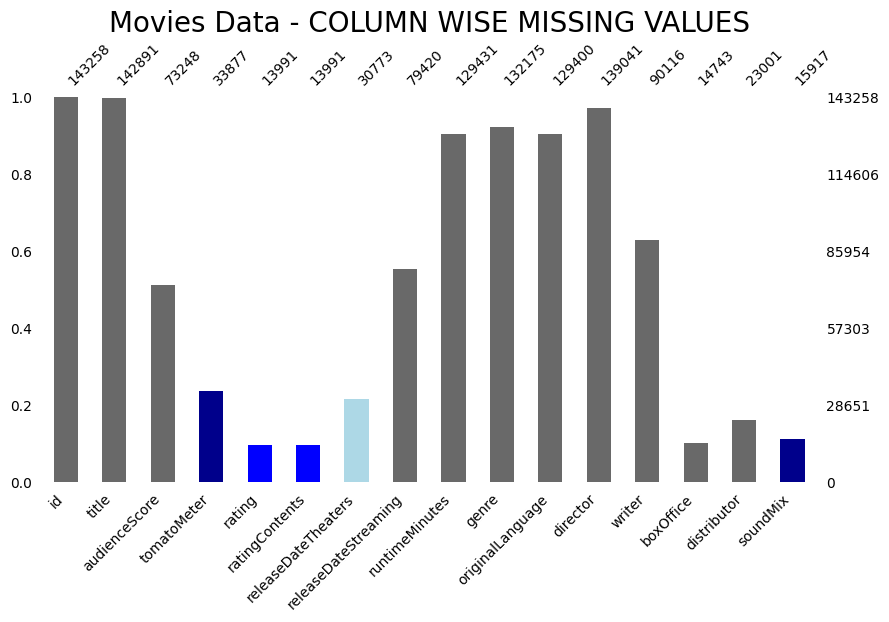

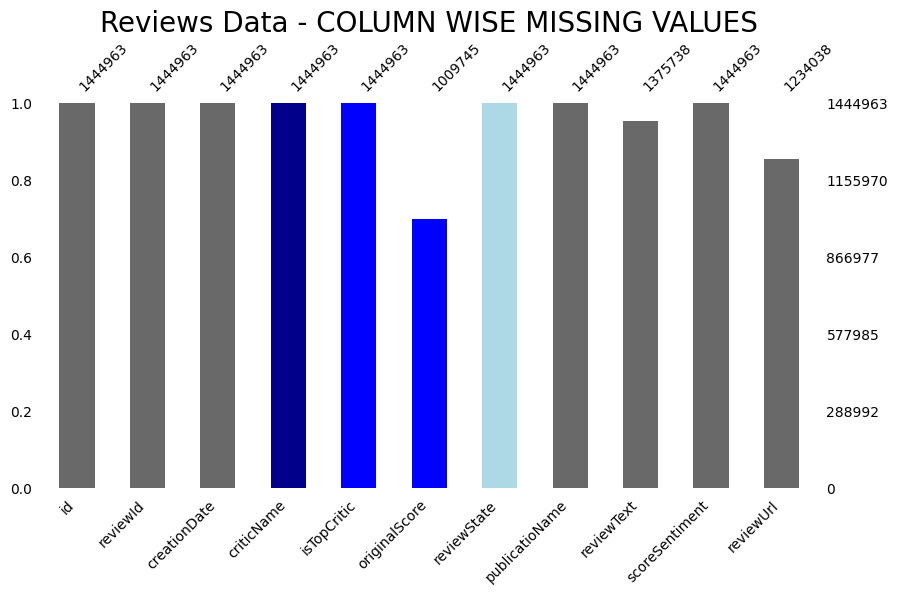

In [5]:
import missingno as msno
import matplotlib.pyplot as plt

color = ['dimgrey','dimgrey','dimgrey','darkblue','blue','blue','lightblue','dimgrey','dimgrey','dimgrey','dimgrey','dimgrey']

# Missing values for movies_df
msno.bar(movies_df, fontsize=10, color=color, figsize=(10,5))
plt.title('Movies Data - COLUMN WISE MISSING VALUES', fontsize=20)
plt.savefig("movies_missing_values.png", dpi=300, bbox_inches='tight')  # Save as image
plt.show()

# Missing values for reviews_df
msno.bar(reviews_df, fontsize=10, color=color, figsize=(10,5))
plt.title('Reviews Data - COLUMN WISE MISSING VALUES', fontsize=20)
plt.savefig("reviews_missing_values.png", dpi=300, bbox_inches='tight')  # Save as image
plt.show()

In [ ]:
import pandas as pd

# Show missing values before filling
print("Missing values BEFORE filling:\n")
print(movies_df.isna().sum())

# --- Clean numeric columns ---

# Clean runtimeMinutes (remove 'min', spaces, convert to numeric)
if 'runtimeMinutes' in movies_df.columns:
    movies_df['runtimeMinutes'] = (
        movies_df['runtimeMinutes']
        .astype(str)
        .str.replace("min", "", regex=False)
        .str.strip()
    )
    movies_df['runtimeMinutes'] = pd.to_numeric(movies_df['runtimeMinutes'], errors='coerce')

# Clean boxOffice (remove $, commas, M, etc.)
if 'boxOffice' in movies_df.columns:
    movies_df['boxOffice'] = (
        movies_df['boxOffice']
        .astype(str)
        .str.replace(r'[\$,]', '', regex=True)   # remove $ and ,
        .str.replace('M', '000000', regex=False) # expand M into full number
        .str.replace('K', '000', regex=False)    # expand K into full number
        .str.strip()
    )
    movies_df['boxOffice'] = pd.to_numeric(movies_df['boxOffice'], errors='coerce')

# Convert other numeric columns safely
for col in ['audienceScore', 'tomatoMeter']:
    if col in movies_df.columns:
        movies_df[col] = pd.to_numeric(movies_df[col], errors='coerce')

# --- Fill missing values ---

# Fill categorical columns with mode
for col in ['rating', 'ratingContents', 'genre', 'originalLanguage',
            'director', 'writer', 'distributor', 'soundMix']:
    if col in movies_df.columns and movies_df[col].isna().sum() > 0:
        movies_df[col] = movies_df[col].fillna(movies_df[col].mode()[0])

# Fill numeric columns with mean
for col in ['audienceScore', 'tomatoMeter', 'runtimeMinutes', 'boxOffice']:
    if col in movies_df.columns and movies_df[col].isna().sum() > 0:
        movies_df[col] = movies_df[col].fillna(movies_df[col].mean())

# Report after filling
print("\nMissing values AFTER filling:\n")
print(movies_df.isna().sum())

Missing values BEFORE filling:

id                           0
title                       62
audienceScore            60425
tomatoMeter              96790
rating                  115514
ratingContents          115514
releaseDateTheaters      98912
releaseDateStreaming     51051
runtimeMinutes               0
genre                      282
originalLanguage          2932
director                  3140
writer                   41045
boxOffice               114730
distributor             106611
soundMix                113527
releaseYear              98912
Decade                   98912
dtype: int64

Missing values AFTER filling:

id                          0
title                      62
audienceScore               0
tomatoMeter                 0
rating                      0
ratingContents              0
releaseDateTheaters     98912
releaseDateStreaming    51051
runtimeMinutes              0
genre                       0
originalLanguage            0
director                    0
write

In [ ]:
import pandas as pd

# Example: load data from a CSV (replace with your file path)
reviews_df = pd.read_csv("rotten_tomatoes_movie_reviews.csv")

# Now you can safely run the missing value handling
columns_to_fill = ['creationDate', 'originalScore', 'reviewState', 'publicationName']

for col in columns_to_fill:
    if col in reviews_df.columns and not reviews_df[col].dropna().empty:
        reviews_df[col] = reviews_df[col].fillna(reviews_df[col].mode()[0])

print(reviews_df.head())

                                  id  reviewId creationDate       criticName  \
0                            beavers   1145982   2003-05-23  Ivan M. Lincoln   
1                         blood_mask   1636744   2007-06-02    The Foywonder   
2  city_hunter_shinjuku_private_eyes   2590987   2019-05-28     Reuben Baron   
3  city_hunter_shinjuku_private_eyes   2558908   2019-02-14      Matt Schley   
4                 dangerous_men_2015   2504681   2018-08-29        Pat Padua   

   isTopCritic originalScore reviewState                 publicatioName  \
0        False         3.5/4       fresh  Deseret News (Salt Lake City)   
1        False           1/5      rotten                  Dread Central   
2        False           3/5       fresh                            CBR   
3        False         2.5/5      rotten                    Japan Times   
4        False           3/5       fresh                          DCist   

                                          reviewText scoreSentiment 

In [6]:
import pandas as pd

# Load dataset first
movies_df = pd.read_csv("C:/Users/Aheesha/Desktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movies.csv")

# Now drop rows where director or writer is missing
movies_df = movies_df.dropna(how='any', subset=['director', 'writer'])

print(movies_df.head())

                     id                title  audienceScore  tomatoMeter  \
0    space-zombie-bingo  Space Zombie Bingo!           50.0          NaN   
1       the_green_grass      The Green Grass            NaN          NaN   
2             love_lies           Love, Lies           43.0          NaN   
3  the_sore_losers_1997          Sore Losers           60.0          NaN   
4  dinosaur_island_2002      Dinosaur Island           70.0          NaN   

  rating ratingContents releaseDateTheaters releaseDateStreaming  \
0    NaN            NaN                 NaN           2018-08-25   
1    NaN            NaN                 NaN           2020-02-11   
2    NaN            NaN                 NaN                  NaN   
3    NaN            NaN                 NaN           2020-10-23   
4    NaN            NaN                 NaN           2017-03-27   

   runtimeMinutes                          genre originalLanguage  \
0            75.0         Comedy, Horror, Sci-fi          English

In [ ]:
movies_df.isna().sum()

,0
id,0
title,42
audienceScore,38182
tomatoMeter,63128
rating,77078
ratingContents,77078
releaseDateTheaters,65041
releaseDateStreaming,30806
runtimeMinutes,1721
genre,87


In [ ]:
reviews_df.isna().sum()

,0
id,0
reviewId,0
creationDate,0
criticName,0
isTopCritic,0
originalScore,435218
reviewState,0
publicatioName,0
reviewText,69225
scoreSentiment,0


In [ ]:
movies_df.duplicated().sum()

np.int64(748)

In [ ]:
reviews_df.duplicated().sum()

np.int64(12394)

In [ ]:
if "genre" in movies_df.columns:
    movies_df['genre'] = movies_df['genre'].apply(
        lambda x: x.split(",")[0] if isinstance(x, str) else x
    )
    print(movies_df['genre'].head())

0     Comedy
1      Drama
2      Drama
3     Action
4    Fantasy
Name: genre, dtype: object


In [ ]:
import pandas as pd

def clean_reviews(reviews_df):
    # Copy dataframe to avoid modifying original
    df = reviews_df.copy()

    # Strip whitespace if columns exist
    if "criticName" in df.columns:
        df["criticName"] = df["criticName"].astype(str).str.strip()

    if "publicationName" in df.columns:
        df["publicationName"] = df["publicationName"].astype(str).str.strip()

    # Handle missing reviewText
    if "reviewText" in df.columns:
        df["reviewText"] = df["reviewText"].fillna("No Review")

    # Extract year from creationDate if it exists
    if "creationDate" in df.columns:
        df["creationYear"] = pd.to_datetime(
            df["creationDate"], errors="coerce"
        ).dt.year

    return df


# ---- Call the function and display results ----
# Example: clean your reviews_df and print first rows
cleaned_df = clean_reviews(reviews_df)

print(cleaned_df.head())

                                  id  reviewId creationDate       criticName  \
0                            beavers   1145982   2003-05-23  Ivan M. Lincoln   
1                         blood_mask   1636744   2007-06-02    The Foywonder   
2  city_hunter_shinjuku_private_eyes   2590987   2019-05-28     Reuben Baron   
3  city_hunter_shinjuku_private_eyes   2558908   2019-02-14      Matt Schley   
4                 dangerous_men_2015   2504681   2018-08-29        Pat Padua   

   isTopCritic originalScore reviewState                 publicatioName  \
0        False         3.5/4       fresh  Deseret News (Salt Lake City)   
1        False           1/5      rotten                  Dread Central   
2        False           NaN       fresh                            CBR   
3        False         2.5/5      rotten                    Japan Times   
4        False           NaN       fresh                          DCist   

                                          reviewText scoreSentiment 

In [ ]:
# Check available columns first
import pandas as pd

# Extract release year from theater release date
movies_df['releaseYearTheaters'] = pd.to_datetime(movies_df['releaseDateTheaters'], errors='coerce').dt.year

# Extract release year from streaming release date
movies_df['releaseYearStreaming'] = pd.to_datetime(movies_df['releaseDateStreaming'], errors='coerce').dt.year

# Preview
print(movies_df[['title', 'releaseYearTheaters', 'releaseYearStreaming']].head())

                 title  releaseYearTheaters  releaseYearStreaming
0  Space Zombie Bingo!                  NaN                2018.0
1      The Green Grass                  NaN                2020.0
2           Love, Lies                  NaN                   NaN
3          Sore Losers                  NaN                2020.0
4      Dinosaur Island                  NaN                2017.0


In [ ]:
movies_df['genre'].value_counts()

,count
genre,
Drama,25143
Comedy,15668
Documentary,8859
Horror,6622
Mystery & thriller,6619
Action,6108
Romance,4135
Crime,2874
Kids & family,2595


In [ ]:
# Split into Movies and TV Shows based on 'genre' column
movie_df = movies_df[movies_df['genre'].str.contains("Movie", case=False, na=False)]
tv_df = movies_df[movies_df['genre'].str.contains("TV", case=False, na=False)]

print("Movies sample:")
print(movie_df.head())

print("\nTV Shows sample:")
print(tv_df.head())

Movies sample:
Empty DataFrame
Columns: [id, title, audienceScore, tomatoMeter, rating, ratingContents, releaseDateTheaters, releaseDateStreaming, runtimeMinutes, genre, originalLanguage, director, writer, boxOffice, distributor, soundMix, releaseYearTheaters, releaseYearStreaming]
Index: []

TV Shows sample:
Empty DataFrame
Columns: [id, title, audienceScore, tomatoMeter, rating, ratingContents, releaseDateTheaters, releaseDateStreaming, runtimeMinutes, genre, originalLanguage, director, writer, boxOffice, distributor, soundMix, releaseYearTheaters, releaseYearStreaming]
Index: []


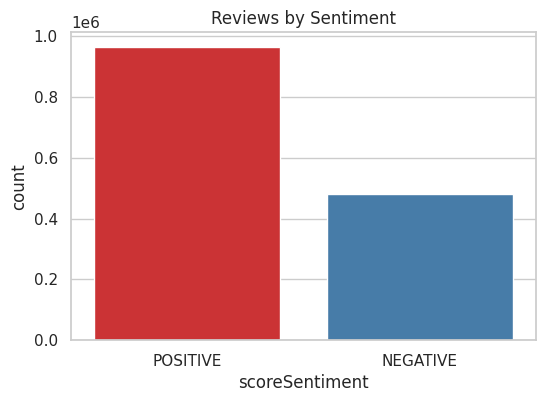

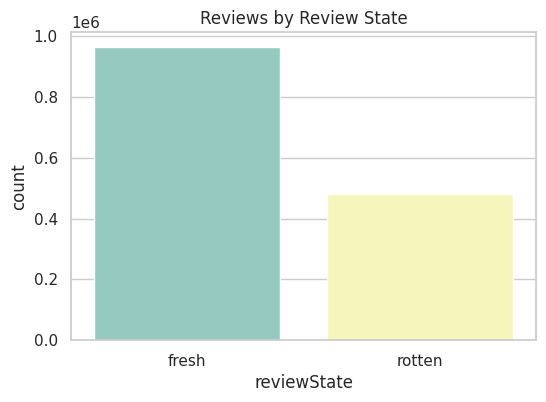

In [ ]:
# Reviews by Sentiment
plt.figure(figsize=(6,4))
sb.countplot(x="scoreSentiment", data=reviews_df, palette="Set1")
plt.title("Reviews by Sentiment")
plt.show()

# Reviews by Review State
plt.figure(figsize=(6,4))
sb.countplot(x="reviewState", data=reviews_df, palette="Set3")
plt.title("Reviews by Review State")
plt.show()

In [ ]:
# Check dataframe shape
print("Shape of DataFrame:", tv_df.shape)

# First few rows
print(tv_df.head())

# Check column names
print("Columns:", tv_df.columns.tolist())

# Check unique values in rating
print("Unique values in rating:", tv_df['rating'].unique())

# Count missing values
print("Missing values in rating:", tv_df['rating'].isnull().sum())

Shape of DataFrame: (0, 18)
Empty DataFrame
Columns: [id, title, audienceScore, tomatoMeter, rating, ratingContents, releaseDateTheaters, releaseDateStreaming, runtimeMinutes, genre, originalLanguage, director, writer, boxOffice, distributor, soundMix, releaseYearTheaters, releaseYearStreaming]
Index: []
Columns: ['id', 'title', 'audienceScore', 'tomatoMeter', 'rating', 'ratingContents', 'releaseDateTheaters', 'releaseDateStreaming', 'runtimeMinutes', 'genre', 'originalLanguage', 'director', 'writer', 'boxOffice', 'distributor', 'soundMix', 'releaseYearTheaters', 'releaseYearStreaming']
Unique values in rating: []
Missing values in rating: 0


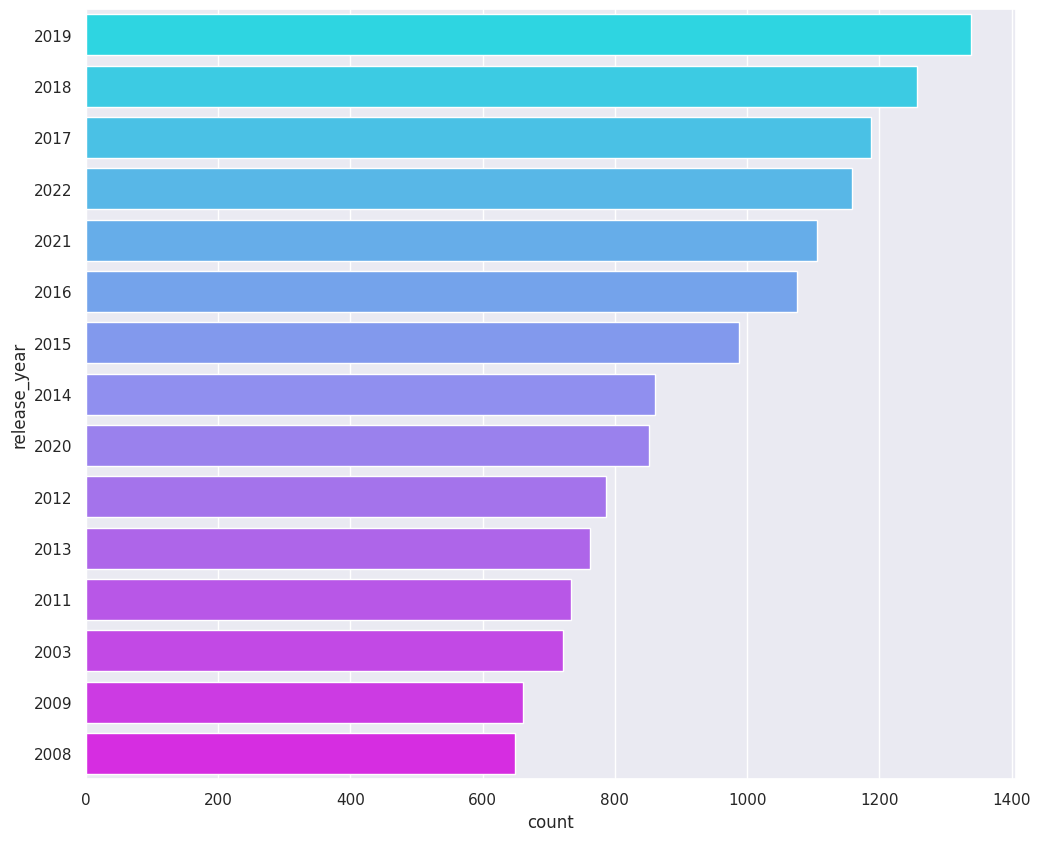

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Load dataset
df = pd.read_csv("rotten_tomatoes_movies.csv")

# Extract release year from releaseDateTheaters
df['release_year'] = pd.to_datetime(df['releaseDateTheaters'], errors='coerce').dt.year

# Drop rows where year could not be extracted
df = df.dropna(subset=['release_year'])

# Convert to int
df['release_year'] = df['release_year'].astype(int)

# Plot top 15 release years
plt.figure(figsize=(12,10))
sb.set(style="darkgrid")
sb.countplot(
    y="release_year",
    data=df,
    palette="cool",
    order=df['release_year'].value_counts().index[:15]
)
plt.show()

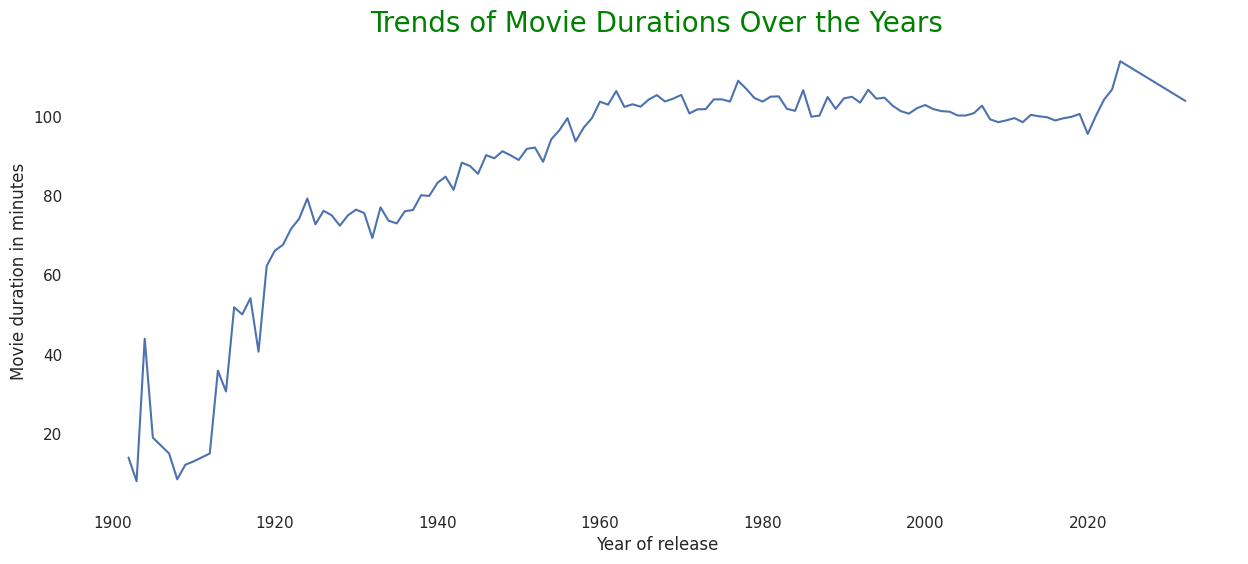

In [ ]:
# Make sure release_year exists
df['release_year'] = pd.to_datetime(df['releaseDateTheaters'], errors='coerce').dt.year
df = df.dropna(subset=['release_year', 'runtimeMinutes'])

# Convert runtimeMinutes to numeric
df['runtimeMinutes'] = pd.to_numeric(df['runtimeMinutes'], errors='coerce')

# Group by release_year and calculate average duration
duration_year = df.groupby('release_year')['runtimeMinutes'].mean().sort_index()

# Plot
plt.figure(figsize=(15,6))
sb.lineplot(x=duration_year.index, y=duration_year.values)
plt.box(on=None)
plt.ylabel('Movie duration in minutes')
plt.xlabel('Year of release')
plt.title("Trends of Movie Durations Over the Years", fontsize=20, color='Green')
plt.show()

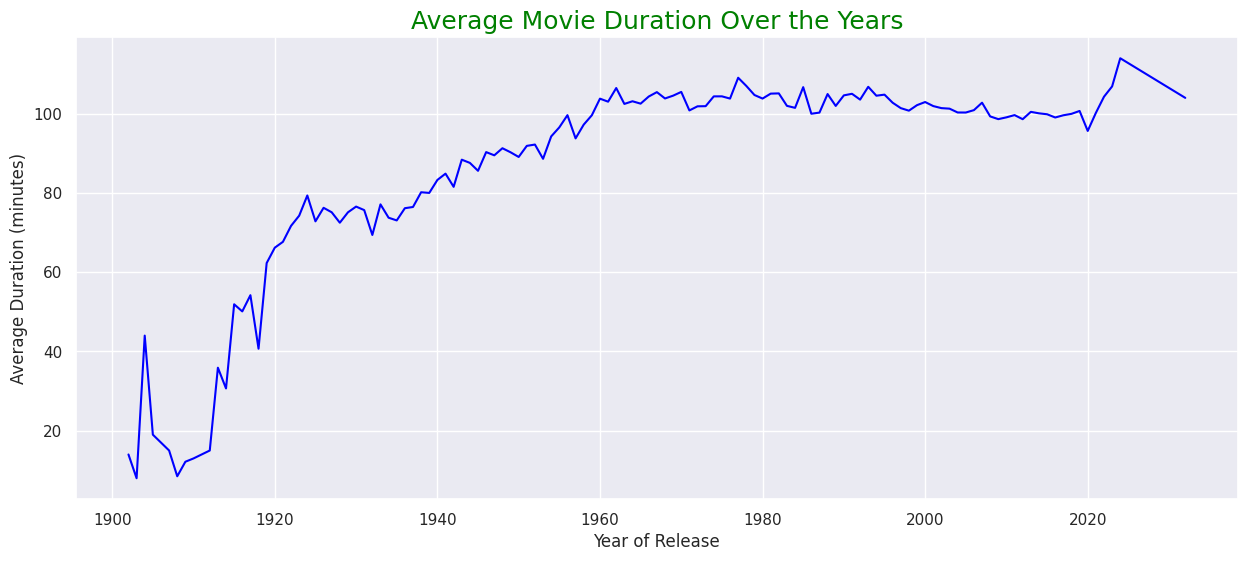

In [ ]:
# Extract release year
df['release_year'] = pd.to_datetime(df['releaseDateTheaters'], errors='coerce').dt.year

# Group by release year
duration_trend = df.groupby('release_year')['runtimeMinutes'].mean().dropna()

plt.figure(figsize=(15,6))
sb.lineplot(x=duration_trend.index, y=duration_trend.values, color="blue")
plt.ylabel("Average Duration (minutes)")
plt.xlabel("Year of Release")
plt.title("Average Movie Duration Over the Years", fontsize=18, color="green")
plt.show()

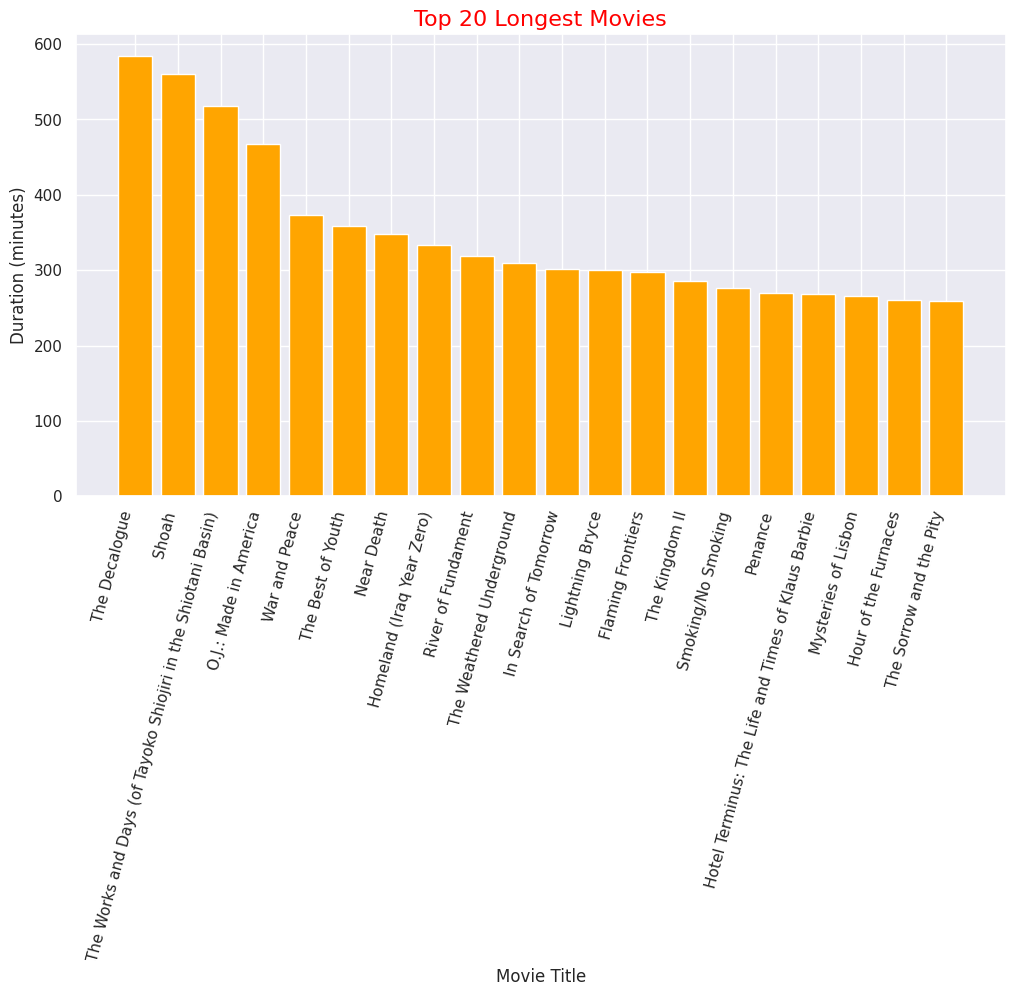

In [ ]:
top20 = df[['title', 'runtimeMinutes']].dropna().sort_values(by='runtimeMinutes', ascending=False).head(20)

plt.figure(figsize=(12,6))
plt.bar(top20['title'], top20['runtimeMinutes'], color='orange')
plt.ylabel("Duration (minutes)")
plt.xlabel("Movie Title")
plt.title("Top 20 Longest Movies", fontsize=16, color="red")
plt.xticks(rotation=75, ha="right")
plt.show()

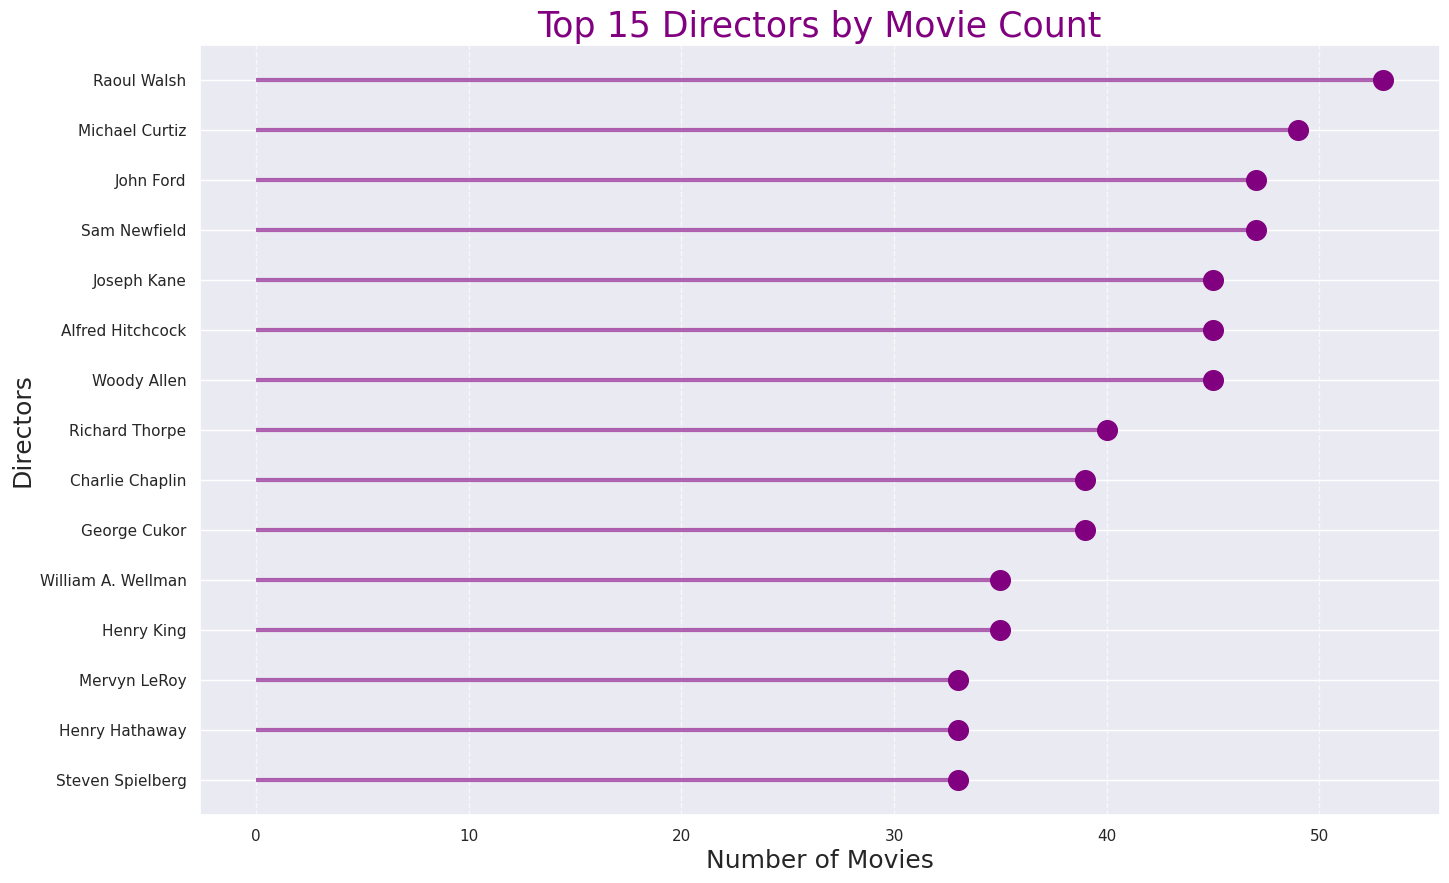

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Load your data into df
# Prepare top 15 directors
top_directors = df['director'].value_counts()[:15].reset_index()
top_directors.columns = ['director', 'count']

# Sort for better visualization
top_directors = top_directors.sort_values('count')

# Plot horizontal lollipop chart
plt.figure(figsize=(16,10))
plt.hlines(
    y=top_directors['director'],
    xmin=0,
    xmax=top_directors['count'],
    color='purple',
    alpha=0.6,
    linewidth=3
)
plt.scatter(
    top_directors['count'],
    top_directors['director'],
    color='purple',
    s=200
)

plt.title('Top 15 Directors by Movie Count', fontsize=25, color='purple')
plt.xlabel('Number of Movies', fontsize=18)
plt.ylabel('Directors', fontsize=18)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

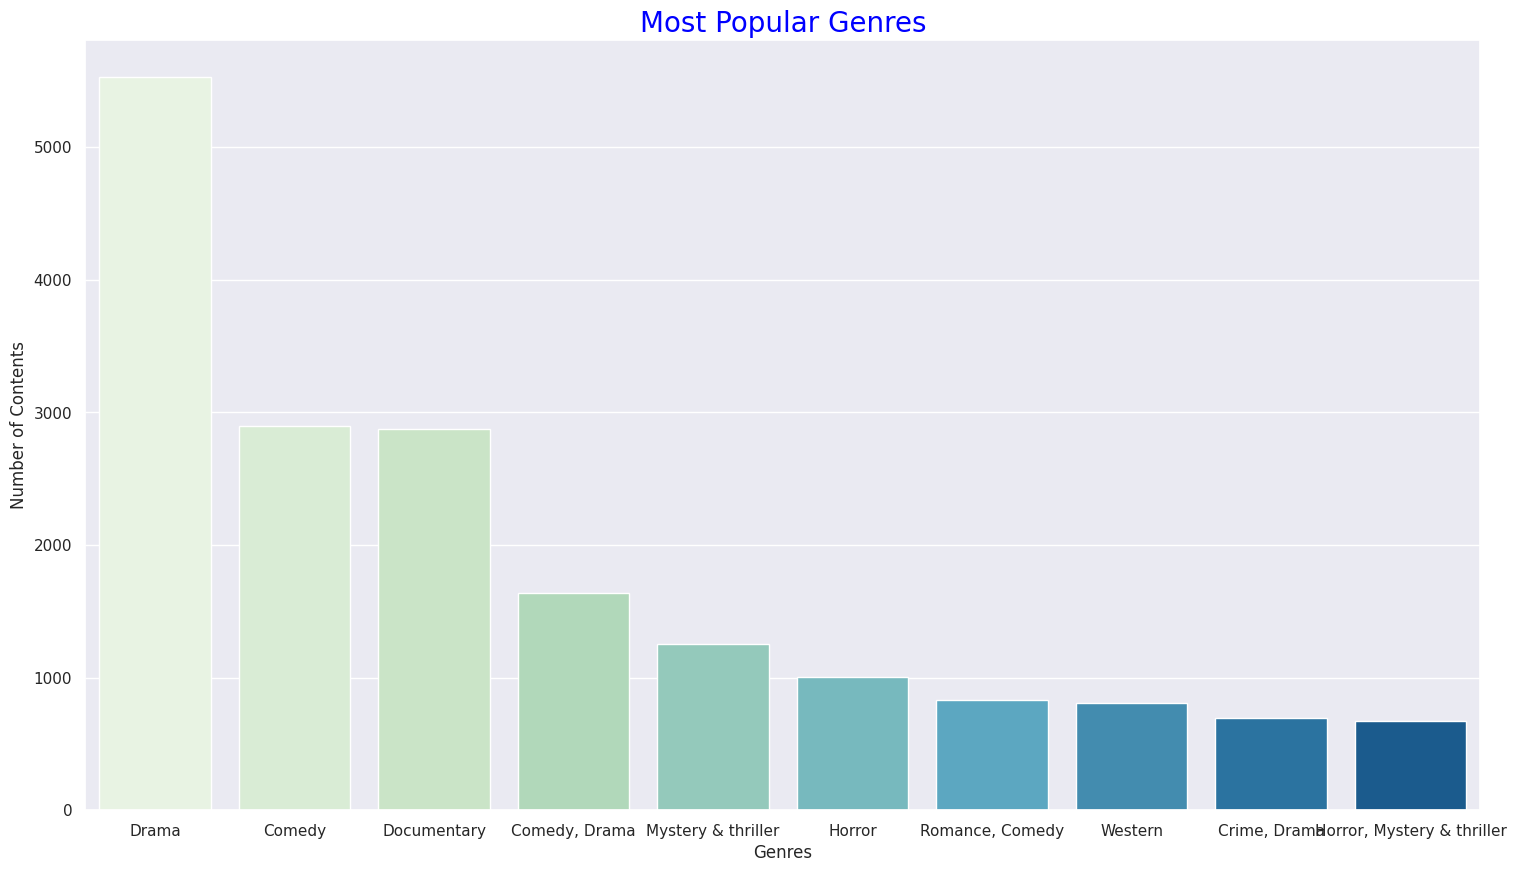

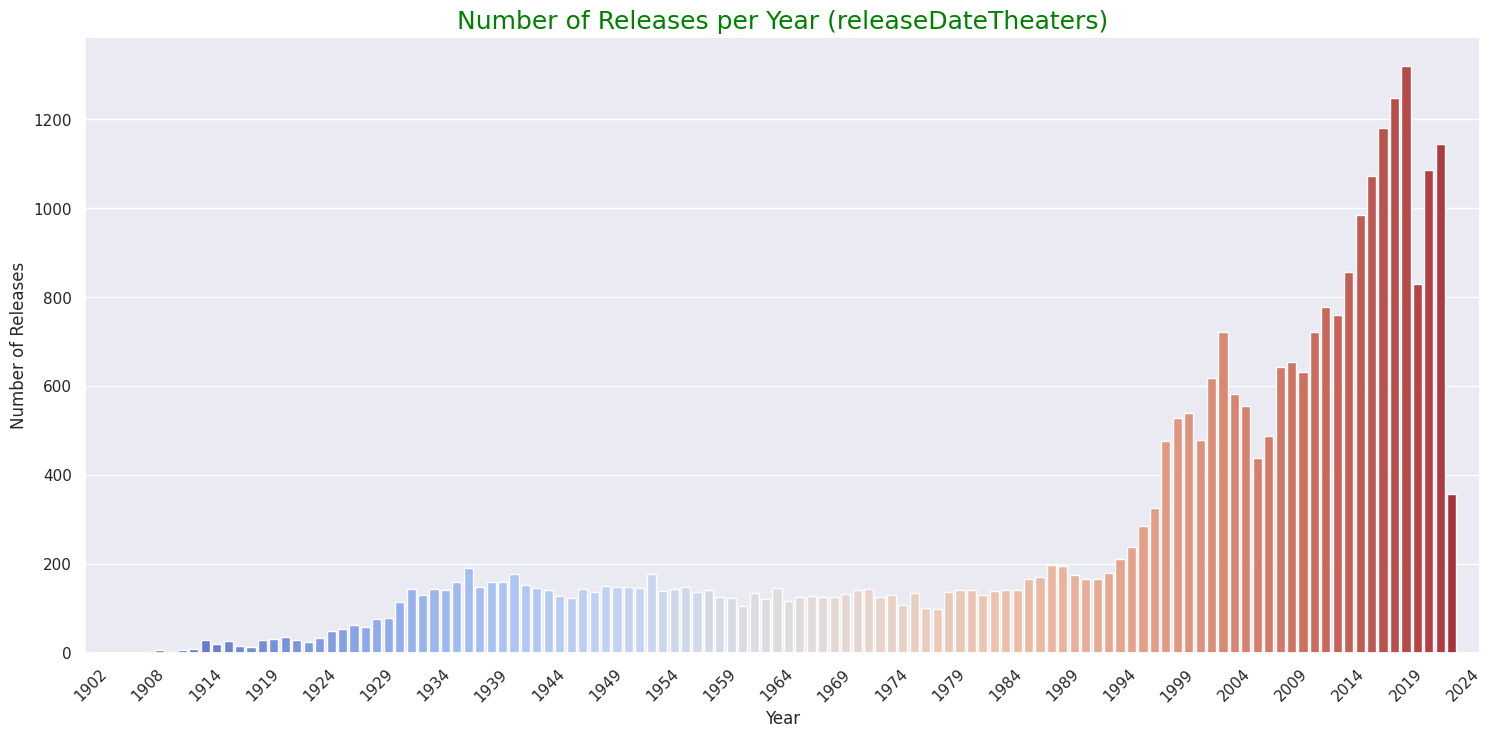

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Make a copy of your DataFrame
df_copy = df.copy()

# ----- GENRE ANALYSIS -----
# Count top 10 genres
top_genres = df_copy['genre'].value_counts().nlargest(10)

# Plot the top 10 genres
plt.figure(figsize=(18,10))
sb.barplot(
    x=top_genres.index,
    y=top_genres.values,
    palette='GnBu'
)
plt.title('Most Popular Genres', color='Blue', fontsize=20)
plt.xlabel('Genres')
plt.ylabel('Number of Contents')
plt.show()

# ----- RELEASE DATE ANALYSIS -----
# Choose a date column to work with (theater release or streaming)
date_column = 'releaseDateTheaters'  # change to 'releaseDateStreaming' if needed

# Convert to datetime safely
df_copy[date_column] = pd.to_datetime(df_copy[date_column], errors='coerce')

# Extract year and month
net_date = pd.DataFrame()
net_date['year'] = df_copy[date_column].dt.year
net_date['month'] = df_copy[date_column].dt.month

# Count releases per year
year_counts = net_date['year'].value_counts().sort_index()

# Plot releases per year
plt.figure(figsize=(18,8))
sb.barplot(x=year_counts.index, y=year_counts.values, palette='coolwarm')
plt.title(f'Number of Releases per Year ({date_column})', fontsize=18, color='green')
plt.xlabel('Year')
plt.ylabel('Number of Releases')

# Show fewer ticks (every 5th year for readability)
plt.xticks(ticks=range(0, len(year_counts.index), 5),
           labels=year_counts.index[::5],
           rotation=45)

plt.show()

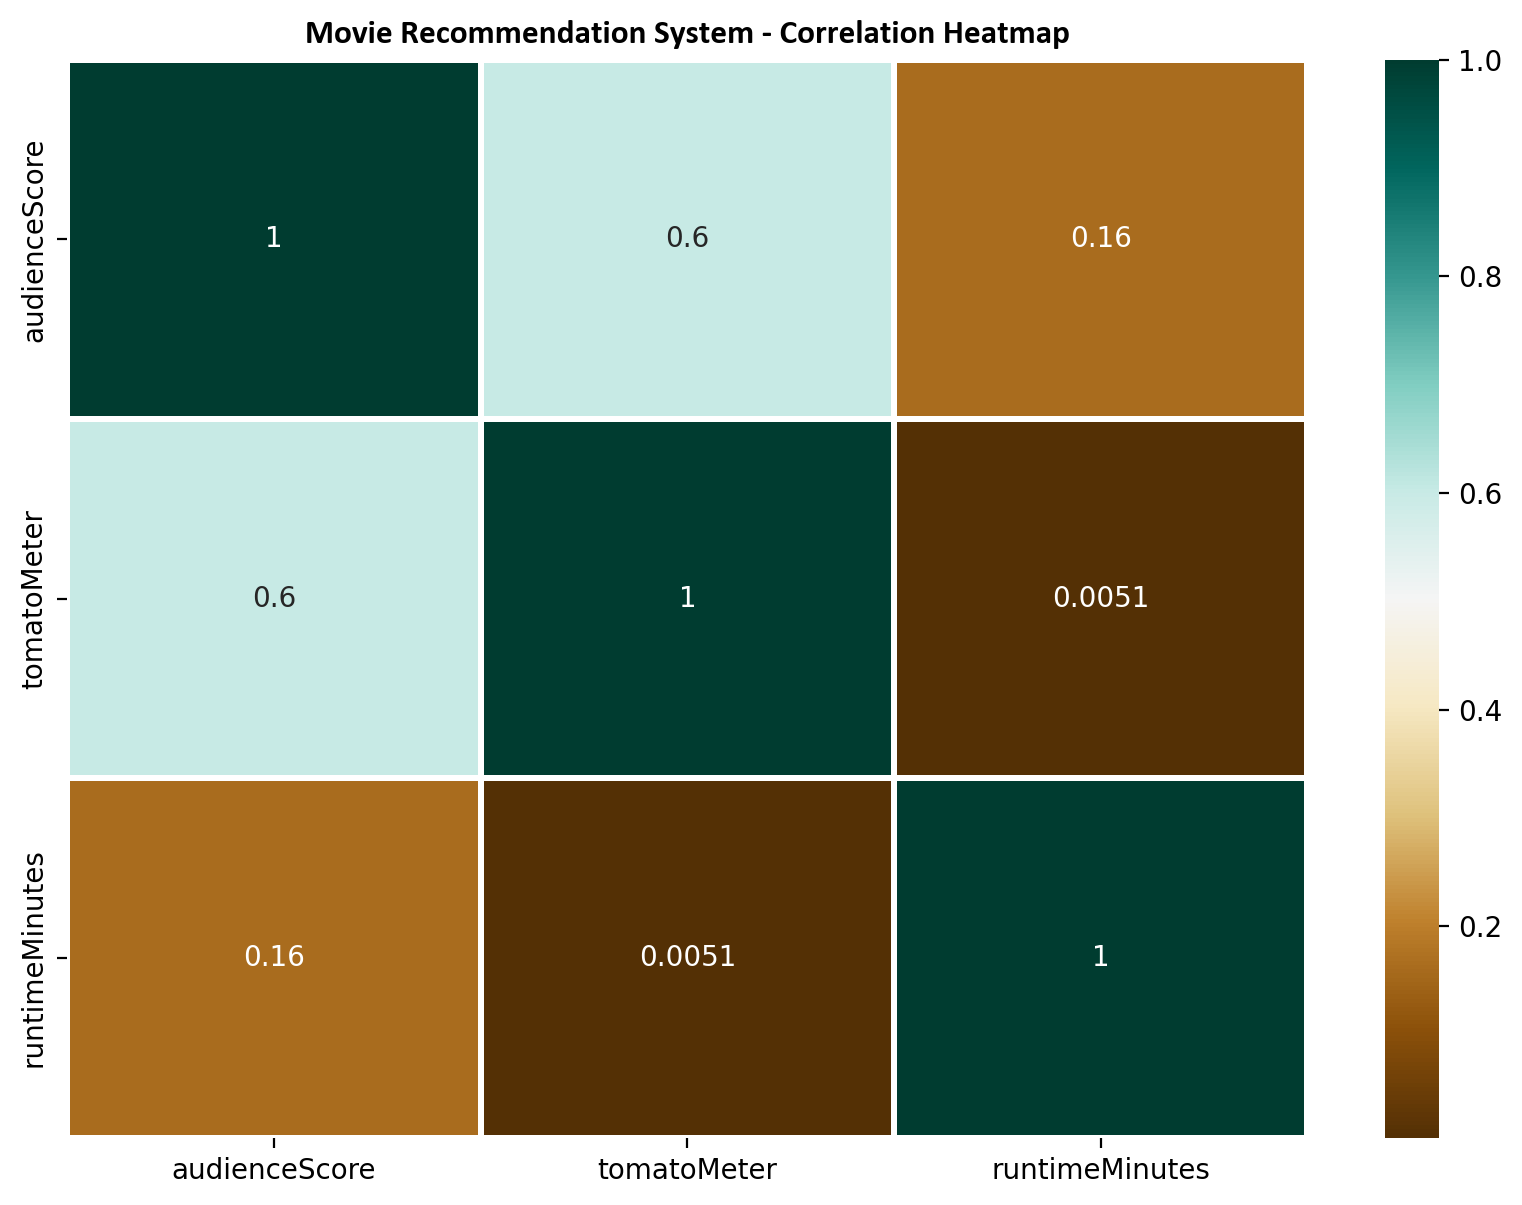

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Load your dataset again
df = pd.read_csv("C:/Users/Aheesha/Desktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movies.csv")

# 2. Select numeric columns only
numeric_df = df[["audienceScore", "tomatoMeter", "runtimeMinutes", "boxOffice"]]

# 3. Plot correlation heatmap
plt.figure(figsize=(10,7), dpi=200)
sns.heatmap(numeric_df.corr(numeric_only=True), cmap="BrBG", annot=True, linewidths=2)

plt.title('Movie Recommendation System - Correlation Heatmap',
          fontsize=12, fontfamily='calibri', fontweight='bold')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Step 1: Create the vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Step 2: Fit and transform review text (drop NaNs first)
reviews_text = reviews_df['reviewText'].dropna()

tfidf_matrix = tfidf.fit_transform(reviews_text)

# Step 3: Inspect results
print("Shape of TF-IDF matrix:", tfidf_matrix.shape)  # (num_docs, num_features)
print("First row (sparse vector):", tfidf_matrix[0])
print("Feature names (vocabulary):", tfidf.get_feature_names_out()[:20])  # first 20 words

Shape of TF-IDF matrix: (1375738, 156600)
First row (sparse vector): <Compressed Sparse Row sparse matrix of dtype 'float64'
	with 13 stored elements and shape (1, 156600)>
  Coords	Values
  (0, 139574)	0.3434237447066824
  (0, 73567)	0.15516790928258448
  (0, 81405)	0.1928020221908123
  (0, 155193)	0.33810944508393614
  (0, 18517)	0.2924961190912179
  (0, 9856)	0.24081072080939647
  (0, 129722)	0.3705284386645866
  (0, 100405)	0.2652197352267493
  (0, 105609)	0.235287590081913
  (0, 69929)	0.2065898311078727
  (0, 2648)	0.33428183651503124
  (0, 78073)	0.269395822396965
  (0, 151243)	0.27010693515534934
Feature names (vocabulary): ['00' '000' '0000' '0000779fd2ac' '0001' '000bc' '000km' '000s' '000th'
 '001' '0014' '007' '007er' '007s' '008' '009' '00s' '00you' '01' '011']


In [ ]:
# Construct a reverse map of indices and movie titles
indices = pd.Series(movies_df.index, index=movies_df['title']).drop_duplicates()

# Display first 10 entries
print(indices.head(10))

title
Space Zombie Bingo!                                 0
The Green Grass                                     1
Love, Lies                                          2
Sore Losers                                         3
Dinosaur Island                                     4
Adrift                                              5
Scrambled Beer                                      6
Born to Kill                                        9
Margarita Happy Hour                               12
Leap of Faith: William Friedkin on The Exorcist    13
dtype: int64


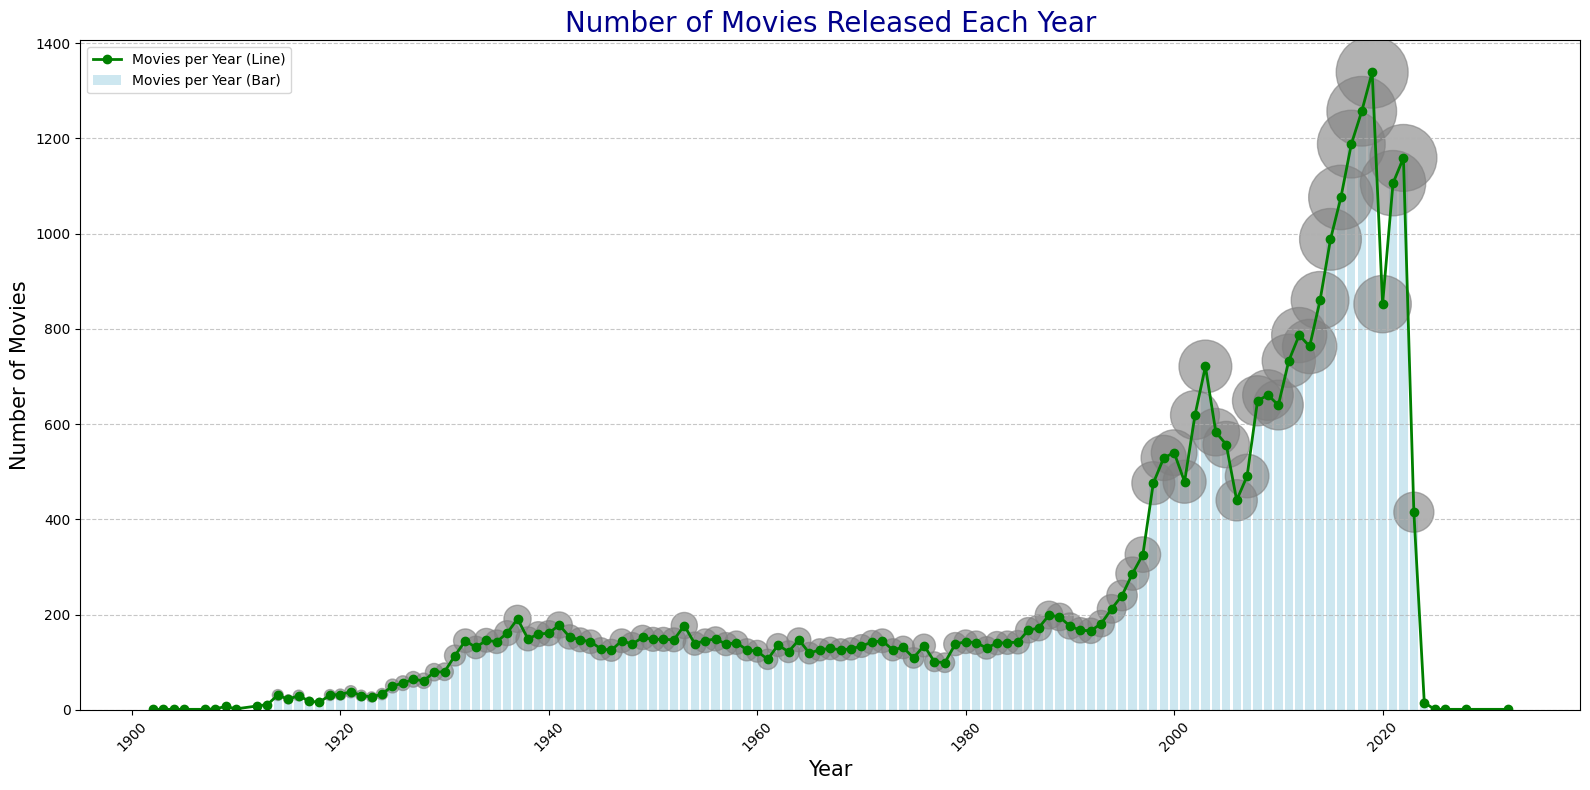

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("C:/Users/Aheesha/Desktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movies.csv")

# Convert releaseDateTheaters to datetime and extract year
df['release_year'] = pd.to_datetime(df['releaseDateTheaters'], errors='coerce').dt.year

# Count movies per year and sort
release_counts = df['release_year'].value_counts().sort_index()

# Create figure
plt.figure(figsize=(16,8))

# Bar chart
plt.bar(
    release_counts.index,
    release_counts.values,
    color='lightblue',
    alpha=0.6,
    label='Movies per Year (Bar)'
)

# Line + scatter
plt.plot(
    release_counts.index,
    release_counts.values,
    color='green',
    linewidth=2,
    marker='o',
    label='Movies per Year (Line)'
)
plt.scatter(
    release_counts.index,
    release_counts.values,
    s=release_counts.values*2,
    color='grey',
    alpha=0.6
)

# Titles and labels
plt.title("Number of Movies Released Each Year", fontsize=20, color='darkblue')
plt.xlabel("Year", fontsize=15)
plt.ylabel("Number of Movies", fontsize=15)
plt.xticks(rotation=45)

# Grid and legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()

plt.tight_layout()
plt.show()

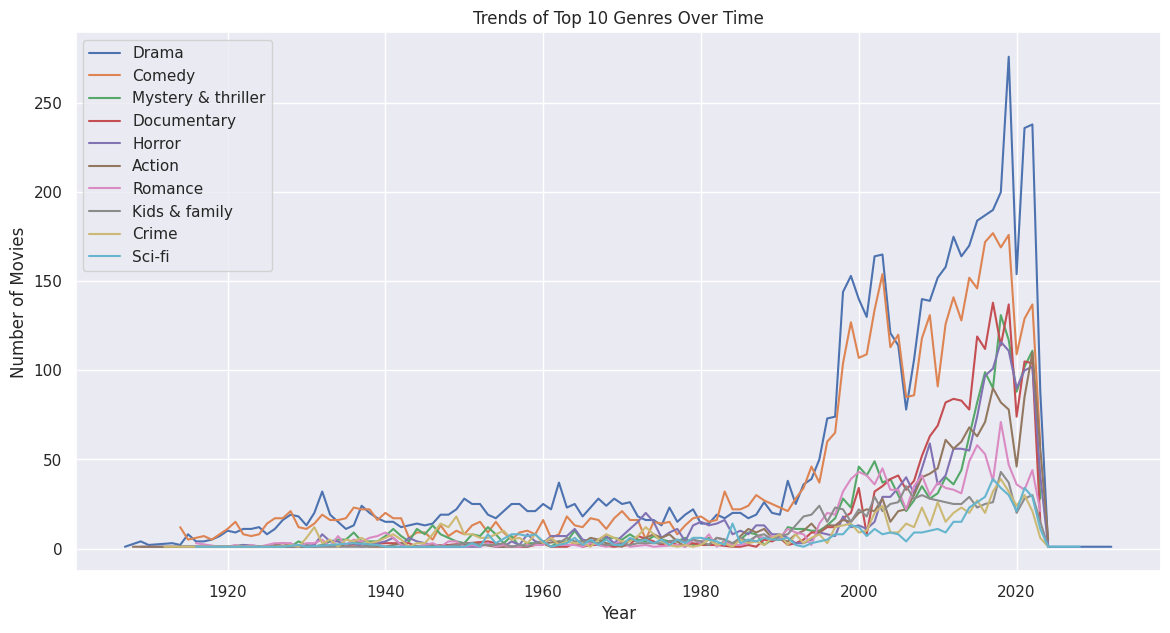

In [ ]:
import matplotlib.pyplot as plt

# Extract release year from the appropriate date column
# Choose either 'releaseDateTheaters' or 'releaseDateStreaming' depending on which one is more complete or relevant
# Based on previous analysis, 'releaseDateTheaters' might have fewer non-null values,
# but let's use it for consistency with the previous release year plots.
movies_df['release_year'] = pd.to_datetime(movies_df['releaseDateTheaters'], errors='coerce').dt.year
movies_df = movies_df.dropna(subset=['release_year'])
movies_df['release_year'] = movies_df['release_year'].astype(int)


# Split genre column into multiple rows
genres_exploded = movies_df.assign(genre=movies_df['genre'].str.split(',')).explode('genre')
genres_exploded['genre'] = genres_exploded['genre'].str.strip()

# Pick top 10 genres
top_genres = genres_exploded['genre'].value_counts().head(10).index
genre_trends = genres_exploded[genres_exploded['genre'].isin(top_genres)]

# Plot trends
plt.figure(figsize=(14,7))
for genre in top_genres:
    # Ensure the 'release_year' column exists in the filtered DataFrame before grouping
    if 'release_year' in genre_trends.columns:
        trend = genre_trends[genre_trends['genre'] == genre].groupby('release_year').size()
        plt.plot(trend.index, trend.values, label=genre)
    else:
        print(f"Warning: 'release_year' column not found in genre_trends for genre '{genre}'")


plt.title("Trends of Top 10 Genres Over Time")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.legend()
plt.show()

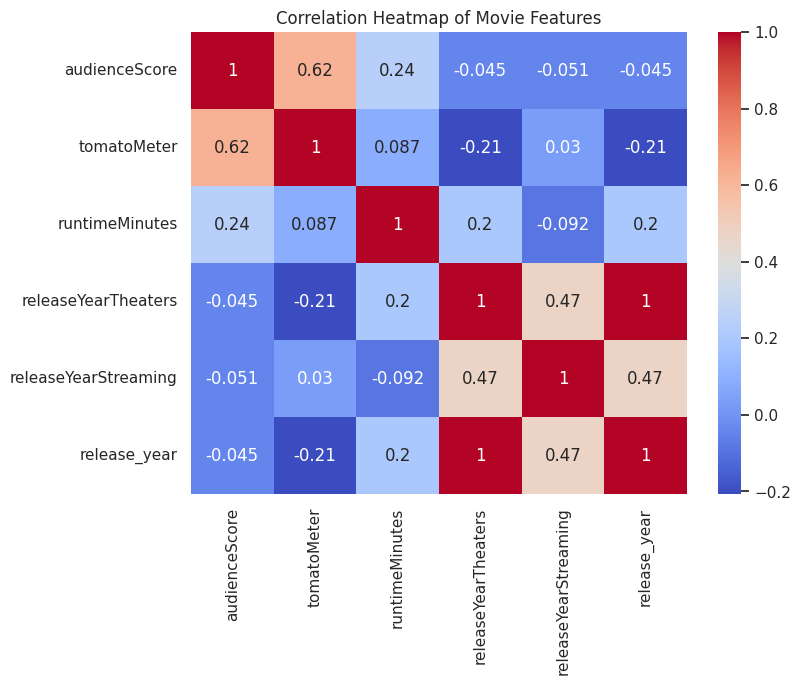

In [ ]:
import seaborn as sns

# Select numeric columns
numeric_cols = movies_df.select_dtypes(include=['int64','float64'])

# Plot heatmap if numeric columns exist
if not numeric_cols.empty:
    plt.figure(figsize=(8,6))
    sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
    plt.title("Correlation Heatmap of Movie Features")
    plt.show()

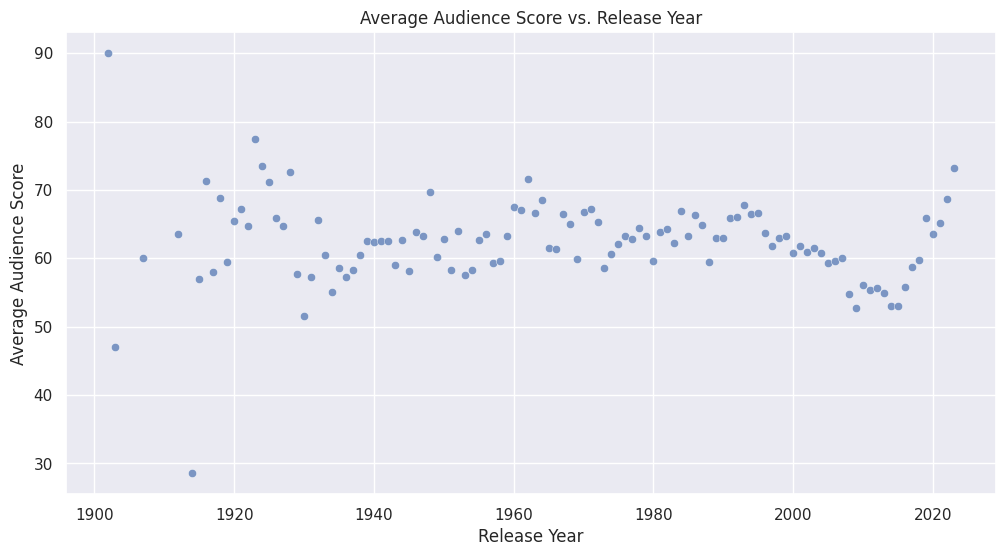

In [ ]:
# Group by release_year and calculate average audience score
avg_scores = movies_df.groupby('release_year')['audienceScore'].mean().reset_index()

# Plot scatter plot
plt.figure(figsize=(12,6))
sns.scatterplot(data=avg_scores, x='release_year', y='audienceScore', alpha=0.7)
plt.title("Average Audience Score vs. Release Year")
plt.xlabel("Release Year")
plt.ylabel("Average Audience Score")
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

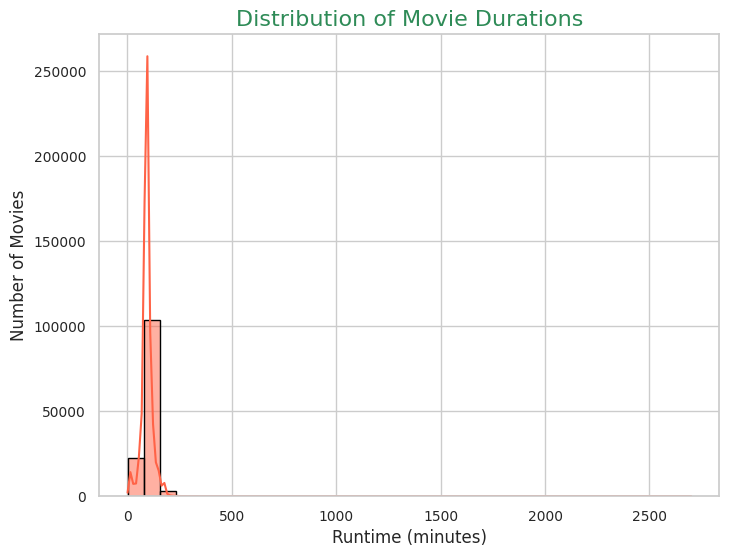

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
movies_df = pd.read_csv("rotten_tomatoes_movies.csv")

# Clean runtimeMinutes (convert to numeric, drop NaN)
movies_df['runtimeMinutes'] = pd.to_numeric(movies_df['runtimeMinutes'], errors='coerce')
movies_df = movies_df.dropna(subset=['runtimeMinutes'])

# Set seaborn style
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(8,6))
sns.histplot(
    movies_df['runtimeMinutes'],
    bins=35,          # balanced number of bins
    kde=True,         # show smooth density curve
    color="#FF6347",  # tomato red
    edgecolor="black" # adds borders for clarity
)

# Customize labels and title
plt.xlabel("Runtime (minutes)", fontsize=12)
plt.ylabel("Number of Movies", fontsize=12)
plt.title("Distribution of Movie Durations", fontsize=16, color="#2E8B57") # sea green title
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Show the plot
plt.show()


In [ ]:
rating_table = (
    movies.groupby('rating')
    .agg(
        Movie_Count=('id', 'count'),
        Avg_Audience_Score=('audienceScore', 'mean'),
        Avg_TomatoMeter=('tomatoMeter', 'mean')
    )
    .reset_index()
    .sort_values('Movie_Count', ascending=False)
)
print("\n Rating Distribution Table\n", rating_table.head())


 Rating Distribution Table
   rating  Movie_Count  Avg_Audience_Score  Avg_TomatoMeter
4      R         7734           49.680798        55.558648
3  PG-13         3446           59.033181        51.957516
2     PG         1911           60.810762        57.604149
8   TVPG          424           49.758389        56.461538
5   TV14          397           47.902878        54.300000


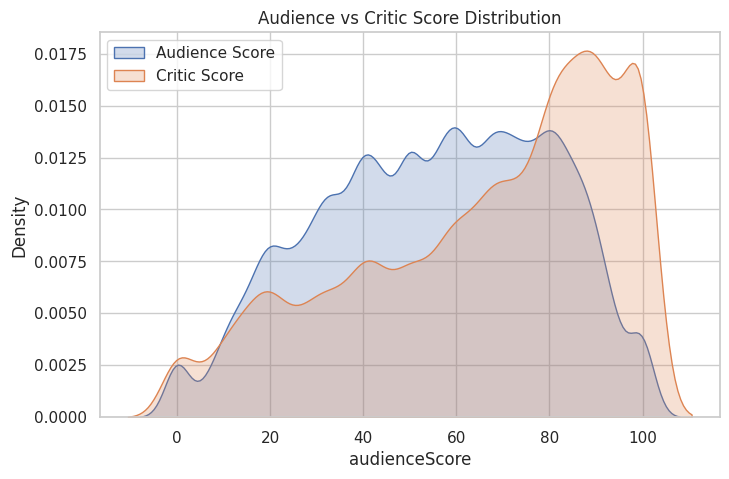

In [ ]:
plt.figure(figsize=(8,5))
sns.kdeplot(movies_df['audienceScore'], label='Audience Score', fill=True)
sns.kdeplot(movies_df['tomatoMeter'], label='Critic Score', fill=True)
plt.title("Audience vs Critic Score Distribution")
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Clean boxOffice column
def convert_boxoffice(value):
    if pd.isna(value):
        return None
    value = str(value).replace('$', '').replace(',', '').strip()
    if value.endswith('K'):
        return float(value[:-1]) * 1_000
    elif value.endswith('M'):
        return float(value[:-1]) * 1_000_000
    elif value.endswith('B'):
        return float(value[:-1]) * 1_000_000_000
    else:
        try:
            return float(value)
        except ValueError:
            return None

movies['boxOffice'] = movies['boxOffice'].apply(convert_boxoffice)

# Clean audienceScore column (if it's string)
movies['audienceScore'] = pd.to_numeric(movies['audienceScore'], errors='coerce')

# Now safely group and aggregate
distributor_table = (
    movies.groupby('distributor', dropna=True)
    .agg(
        Movie_Count=('id', 'count'),
        Avg_Audience_Score=('audienceScore', 'mean'),
        Avg_BoxOffice=('boxOffice', 'mean')
    )
    .reset_index()
    .sort_values('Movie_Count', ascending=False)
    .head(10)
)

print("\nTop 10 Distributors\n", distributor_table)


Top 10 Distributors
                  distributor  Movie_Count  Avg_Audience_Score  Avg_BoxOffice
2400      Paramount Pictures          994           62.860092   5.351930e+07
13          20th Century Fox          745           59.852857   6.398245e+07
3347      Universal Pictures          737           61.240602   6.633405e+07
3496   Warner Bros. Pictures          668           63.271293   6.725150e+07
2017     Metro-Goldwyn-Mayer          603           59.313544   2.470138e+07
1492               IFC Films          550           56.217712   1.049949e+06
702        Columbia Pictures          471           61.923645   5.104707e+07
2921  Sony Pictures Classics          385           71.509186   2.542132e+06
1377       Gravitas Ventures          382           60.644518   4.759636e+05
3279          United Artists          375           62.165605   2.305003e+07


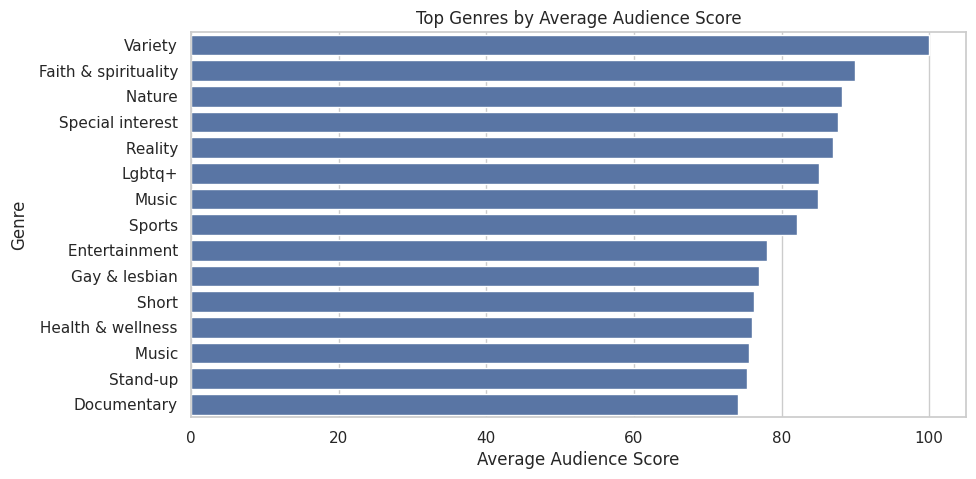

In [ ]:
genre_scores = (movies_df.assign(genre=movies_df['genre'].str.split(','))
                .explode('genre')
                .groupby('genre')['audienceScore']
                .mean()
                .sort_values(ascending=False)
                .head(15))

plt.figure(figsize=(10,5))
sns.barplot(x=genre_scores.values, y=genre_scores.index)
plt.title("Top Genres by Average Audience Score")
plt.xlabel("Average Audience Score")
plt.ylabel("Genre")
plt.show()

In [ ]:
language_table = (
    movies.groupby('originalLanguage')
    .agg(
        Movie_Count=('id', 'count'),
        Avg_Audience_Score=('audienceScore', 'mean'),
        Avg_TomatoMeter=('tomatoMeter', 'mean')
    )
    .reset_index()
    .sort_values('Movie_Count', ascending=False)
)
print("\n Language Distribution Table\n", language_table.head())


 Language Distribution Table
    originalLanguage  Movie_Count  Avg_Audience_Score  Avg_TomatoMeter
22          English        85034           52.727682        61.949395
87          Spanish         4786           59.266462        78.183183
47         Japanese         3482           67.847975        79.902482
39            Hindi         3309           57.046118        52.866366
30  French (Canada)         3282           58.957716        78.504698


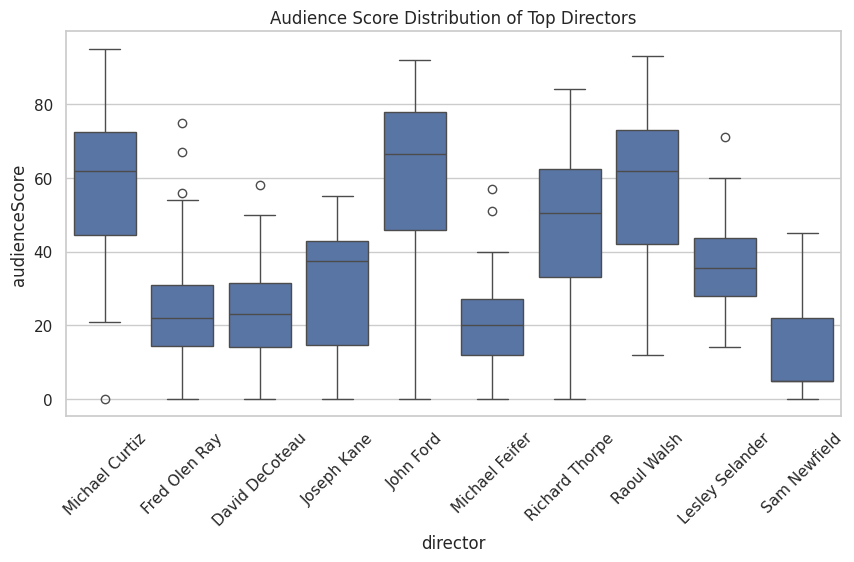

In [ ]:
top_directors = movies_df['director'].value_counts().head(10).index
director_scores = movies_df[movies_df['director'].isin(top_directors)]

plt.figure(figsize=(10,5))
sns.boxplot(x='director', y='audienceScore', data=director_scores)
plt.xticks(rotation=45)
plt.title("Audience Score Distribution of Top Directors")
plt.show()

In [ ]:
runtime_summary = movies['runtimeMinutes'].describe().to_frame(name='Runtime (minutes)')
print("\n Runtime Summary Table\n", runtime_summary)


 Runtime Summary Table
        Runtime (minutes)
count      129431.000000
mean           93.708578
std            28.129175
min             1.000000
25%            84.000000
50%            92.000000
75%           103.000000
max          2700.000000


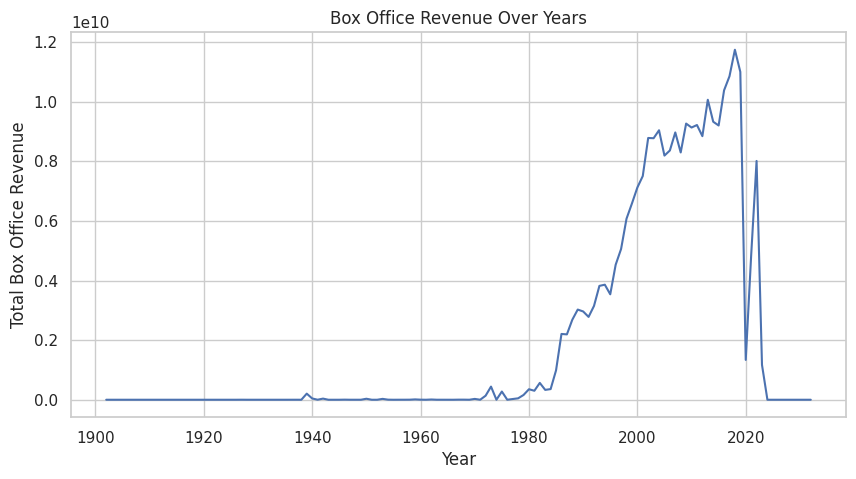

In [ ]:
# Clean boxOffice column
movies_df['boxOffice'] = (
    movies_df['boxOffice']
    .astype(str)
    .str.replace(r'[\$,]', '', regex=True)   # remove $ and ,
    .str.replace('M', 'e6', regex=False) # convert M to scientific notation
    .str.replace('K', 'e3', regex=False)    # convert K to scientific notation
    .str.strip()
)
movies_df['boxOffice'] = pd.to_numeric(movies_df['boxOffice'], errors='coerce')


movies_df['releaseYear'] = pd.to_datetime(movies_df['releaseDateTheaters'], errors='coerce').dt.year
revenue_per_year = movies_df.groupby('releaseYear')['boxOffice'].sum().dropna()

plt.figure(figsize=(10,5))
sns.lineplot(x=revenue_per_year.index, y=revenue_per_year.values)
plt.title("Box Office Revenue Over Years")
plt.xlabel("Year")
plt.ylabel("Total Box Office Revenue")
plt.show()

In [ ]:
boxoffice_genre = (
    movies.groupby('genre')
    .agg(
        Avg_BoxOffice=('boxOffice', 'mean'),
        Median_BoxOffice=('boxOffice', 'median'),
        Movie_Count=('id', 'count')
    )
    .reset_index()
    .sort_values('Avg_BoxOffice', ascending=False)
)
print("\n Box Office Summary by Genre\n", boxoffice_genre.head())


 Box Office Summary by Genre
                                               genre  Avg_BoxOffice  \
2344       Kids & family, Musical, Fantasy, Romance    504000000.0   
2323   Kids & family, Musical, Adventure, Animation    422800000.0   
429   Adventure, Action, Sci-fi, Mystery & thriller    376280000.0   
118   Action, Adventure, Sci-fi, Mystery & thriller    376000000.0   
2728     Sci-fi, Adventure, Action, Fantasy, Comedy    361750000.0   

      Median_BoxOffice  Movie_Count  
2344       504000000.0            1  
2323       422800000.0            4  
429        401800000.0            6  
118        376000000.0            5  
2728       361750000.0            3  


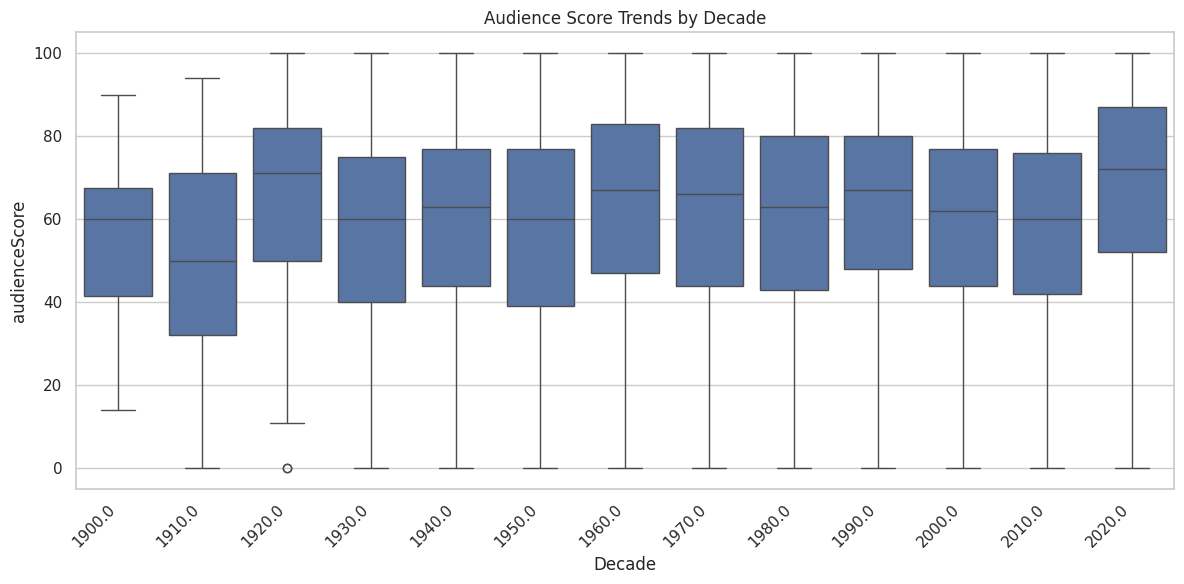

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Calculate the 'Decade' column (this part is fine)
movies_df['Decade'] = (movies_df['releaseYear'] // 10) * 10

# --- NEW FILTERING STEP ---
# 2. Filter out NaN values and decades beyond 2020
# We assume the last full decade of data you want is 2020.
# We also filter out any NaN Decade values (which come from NaN releaseYear).
filtered_df = movies_df[movies_df['Decade'].notna() & (movies_df['Decade'] <= 2020)]

# 4. Set figure size and plot
plt.figure(figsize=(12, 6))

# Sort the unique decades to ensure correct order on the x-axis
decade_order = sorted(filtered_df['Decade'].unique())

sns.boxplot(x='Decade', y='audienceScore', data=filtered_df, order=decade_order)

# Rotate labels for better visibility (as in the previous suggestion)
plt.xticks(rotation=45, ha='right')
plt.title("Audience Score Trends by Decade")

plt.tight_layout()
plt.show()

In [ ]:
director_scores = (
    movies.groupby('director')
    .agg(
        Avg_TomatoMeter=('tomatoMeter', 'mean'),
        Avg_Audience_Score=('audienceScore', 'mean'),
        Movie_Count=('id', 'count')
    )
    .reset_index()
    .sort_values('Avg_TomatoMeter', ascending=False)
    .head(10)
)
print("\n Average Scores by Director\n", director_scores)


 Average Scores by Director
                 director  Avg_TomatoMeter  Avg_Audience_Score  Movie_Count
62066           loundraw            100.0                80.0            1
62062        Zézé Gamboa            100.0                50.0            2
49            A.D. Calvo            100.0                43.5            6
62144      Éric Caravaca            100.0                40.0            2
62143       Éric Besnard            100.0                41.0            5
86         A.V. Rockwell            100.0                 NaN            1
31419      Kamila Andini            100.0                 NaN            3
31385  Kaltrina Krasniqi            100.0                 NaN            1
31368      Kaizô Hayashi            100.0                75.5            8
62049    Zsófia Szilágyi            100.0                 NaN            1


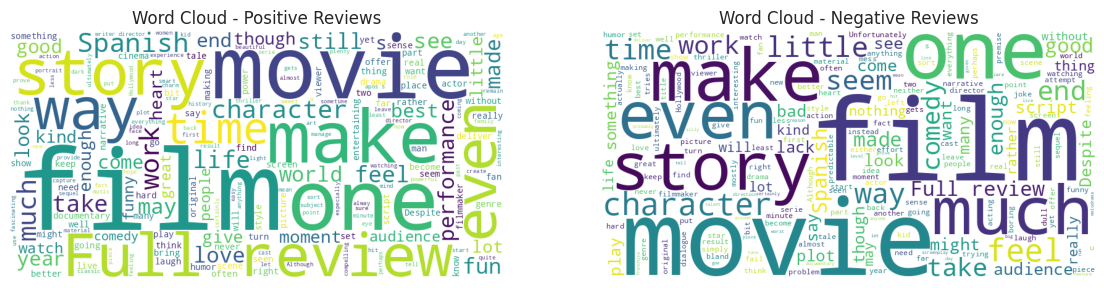

In [ ]:
positive_reviews = ' '.join(reviews_df[reviews_df['scoreSentiment'] == 'POSITIVE']['reviewText'].dropna())
negative_reviews = ' '.join(reviews_df[reviews_df['scoreSentiment'] == 'NEGATIVE']['reviewText'].dropna())

fig, ax = plt.subplots(1, 2, figsize=(14,6))

if positive_reviews:
    ax[0].imshow(WordCloud(width=800, height=400, background_color='white').generate(positive_reviews))
    ax[0].set_title("Word Cloud - Positive Reviews")
    ax[0].axis("off")
else:
    ax[0].set_title("No Positive Reviews to Display Word Cloud")
    ax[0].axis("off")


if negative_reviews:
    ax[1].imshow(WordCloud(width=800, height=400, background_color='white').generate(negative_reviews))
    ax[1].set_title("Word Cloud - Negative Reviews")
    ax[1].axis("off")
else:
    ax[1].set_title("No Negative Reviews to Display Word Cloud")
    ax[1].axis("off")

plt.show()

In [9]:
import pandas as pd
import re
import numpy as np

# Load the reviews DataFrame
reviews = pd.read_csv("C:/Users/Aheesha/Desktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movie_reviews.csv")


# --- Convert originalScore to numeric safely ---
def convert_score(score):
    if pd.isna(score):
        return None
    score = str(score).strip()

    # Case 1: If format like "3.5/5" or "7/10"
    if "/" in score:
        parts = score.split("/")
        try:
            num = float(parts[0])
            den = float(parts[1])
            return (num / den) * 10  # normalize to 0–10 scale
        except:
            return None

    # Case 2: If format like "A-", "B+", etc.
    grade_map = {
        "A+": 10, "A": 9.5, "A-": 9, "B+": 8.5, "B": 8, "B-": 7.5,
        "C+": 7, "C": 6.5, "C-": 6, "D+": 5.5, "D": 5, "D-": 4.5,
        "F": 3
    }
    if score in grade_map:
        return grade_map[score]

    # Case 3: If numeric only
    try:
        return float(score)
    except:
        return None

# Apply conversion
reviews['numeric_score'] = reviews['originalScore'].apply(convert_score)

# --- Now aggregate safely ---
critics_table = (
    reviews.groupby('criticName')
    .agg(
        Review_Count=('reviewId', 'count'),
        Avg_Score=('numeric_score', 'mean')
    )
    .reset_index()
    .sort_values('Review_Count', ascending=False)
    .head(10)
)

print("\n Fixed Top 10 Critics by Review Count\n", critics_table)


 Fixed Top 10 Critics by Review Count
                           criticName  Review_Count  Avg_Score
4626                    Emanuel Levy         13274   6.077686
3977                 Dennis Schwartz         13124   7.588559
12916                    Roger Moore          8413   5.644688
12907                    Roger Ebert          7366   6.941026
2045                   Brian Orndorf          7070   6.925980
6880             Jeffrey M. Anderson          7052   6.939492
3791                    David Nusair          7015   5.515302
5144                   Frank Swietek          6729   6.503948
12525                     Rich Cline          6339   6.761935
5179   Frederic and Mary Ann Brussat          6264   6.957937


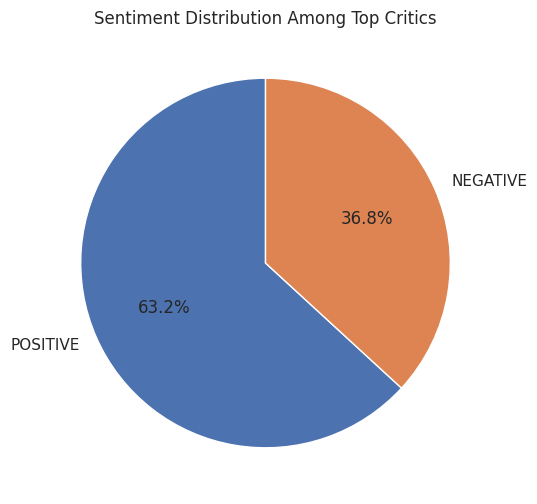

In [ ]:
top_critics = reviews_df[reviews_df['isTopCritic'] == True]
sentiment_counts = top_critics['scoreSentiment'].value_counts(normalize=True)

plt.figure(figsize=(6,6))
sentiment_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Distribution Among Top Critics")
plt.ylabel('')
plt.show()

In [10]:
import pandas as pd

# Load the movies DataFrame
movies = pd.read_csv("C:/Users/Aheesha/Desktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movies.csv")

# Try to find the release date column automatically
date_cols = [c for c in movies.columns if 'release' in c.lower() and 'date' in c.lower()]

if len(date_cols) == 0:
    print("⚠️ No release date column found. Please check your dataset column names.")
else:
    date_col = date_cols[0]
    print(f"✅ Using column for release date: {date_col}")

    # Convert to datetime and extract year
    movies[date_col] = pd.to_datetime(movies[date_col], errors='coerce')
    movies['year'] = movies[date_col].dt.year

    yearly_summary = (
        movies.groupby('year')
        .agg(
            number_of_movies=('id', 'count'),
            avg_audience_score=('audienceScore', 'mean'),
            avg_tomatometer=('tomatoMeter', 'mean')
        )
        .reset_index()
        .sort_values('year')
    )
    print("\nYearly Movie Release Summary\n", yearly_summary.tail(10))

✅ Using column for release date: releaseDateTheaters

Yearly Movie Release Summary
        year  number_of_movies  avg_audience_score  avg_tomatometer
115  2019.0              1339           67.064756        68.161470
116  2020.0               852           65.071121        70.041742
117  2021.0              1106           66.362434        72.307882
118  2022.0              1159           70.059250        70.213235
119  2023.0               415           74.352332        70.316742
120  2024.0                15                 NaN              NaN
121  2025.0                 1                 NaN              NaN
122  2026.0                 1                 NaN              NaN
123  2028.0                 1                 NaN              NaN
124  2032.0                 1                 NaN        92.000000


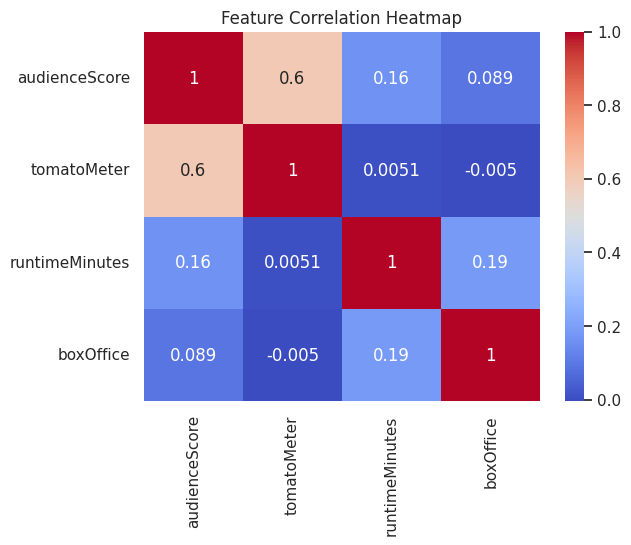

In [ ]:
numeric_cols = ['audienceScore', 'tomatoMeter', 'runtimeMinutes', 'boxOffice']
sns.heatmap(movies_df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
#Cleaning boxOffice to Numeric
"""the correlation calculation is failing because boxOffice is stored as a string with symbols like $ and M ("$31.4M")
instead of a numeric value. Pandas cannot convert this to float automatically."""
#No need to add this in report or to show
import numpy as np

def parse_box_office(x):
    if pd.isna(x):
        return np.nan
    x = str(x).replace('$', '').replace(',', '').strip()

    # Convert "M" to millions, "K" to thousands
    if x.endswith('M'):
        try:
            return float(x[:-1]) * 1_000_000
        except:
            return np.nan
    elif x.endswith('K'):
        try:
            return float(x[:-1]) * 1_000
        except:
            return np.nan
    else:
        try:
            return float(x)
        except:
            return np.nan
# Apply the cleaning function
if 'boxOffice' in movies.columns:
    movies['boxOffice'] = movies['boxOffice'].apply(parse_box_office)

# Check the cleaned values
print(movies[['title', 'boxOffice']].head(10))


                                              title   boxOffice
0                               Space Zombie Bingo!         NaN
1                                   The Green Grass         NaN
2                                        Love, Lies         NaN
3                                       Sore Losers         NaN
4                                   Dinosaur Island         NaN
5                                            Adrift  31400000.0
6                                    Scrambled Beer         NaN
7  Kakabakaba ka ba? (Will Your Heart Beat Faster?)         NaN
8                                        Sundowning         NaN
9                                      Born to Kill         NaN


In [11]:
import pandas as pd
import numpy as np

# Load the movies DataFrame
movies = pd.read_csv("C:/Users/Aheesha/Desktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movies.csv")

# Apply the cleaning function for boxOffice
def parse_box_office(x):
    if pd.isna(x):
        return np.nan
    x = str(x).replace('$', '').replace(',', '').strip()

    # Convert "M" to millions, "K" to thousands
    if x.endswith('M'):
        try:
            return float(x[:-1]) * 1_000_000
        except:
            return np.nan
    elif x.endswith('K'):
        try:
            return float(x[:-1]) * 1_000
        except:
            return np.nan
    else:
        try:
            return float(x)
        except:
            return np.nan
# Apply the cleaning function
if 'boxOffice' in movies.columns:
    movies['boxOffice'] = movies['boxOffice'].apply(parse_box_office)

num_features = ['audienceScore', 'tomatoMeter', 'runtimeMinutes', 'boxOffice']
available_features = [f for f in num_features if f in movies.columns]

# Keep only numeric columns
movies_numeric = movies[available_features].apply(pd.to_numeric, errors='coerce')

# Compute correlation
corr_table = (
    movies_numeric.corr()
    .stack()
    .reset_index()
    .rename(columns={'level_0': 'Feature1', 'level_1': 'Feature2', 0: 'Correlation'})
)

# Remove self-correlations
corr_table = corr_table[corr_table['Feature1'] != corr_table['Feature2']].reset_index(drop=True)
print("\n Correlation Summary Table\n", corr_table.head(10))


 Correlation Summary Table
          Feature1        Feature2  Correlation
0   audienceScore     tomatoMeter     0.602345
1   audienceScore  runtimeMinutes     0.160563
2   audienceScore       boxOffice     0.089233
3     tomatoMeter   audienceScore     0.602345
4     tomatoMeter  runtimeMinutes     0.005100
5     tomatoMeter       boxOffice    -0.004827
6  runtimeMinutes   audienceScore     0.160563
7  runtimeMinutes     tomatoMeter     0.005100
8  runtimeMinutes       boxOffice     0.185551
9       boxOffice   audienceScore     0.089233


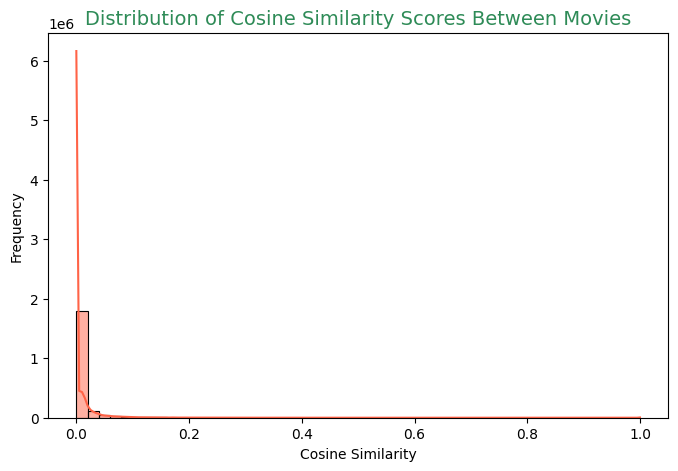

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Load the dataset
movies_df = pd.read_csv("C:/Users/Aheesha/Desktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movies.csv")

# Combine relevant text features
movies_df['combined_features'] = movies_df[['genre', 'director', 'writer']].fillna('').agg(' '.join, axis=1)

# Optional: Sample a subset if dataset is large (e.g., 2000 movies)
sample_df = movies_df.sample(n=2000, random_state=42)

# TF-IDF vectorization
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(sample_df['combined_features'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix)

# Take only the upper triangle (excluding diagonal) to save memory
upper_tri = cosine_sim[np.triu_indices_from(cosine_sim, k=1)]

# Plot histogram of cosine similarity
plt.figure(figsize=(8,5))
sns.histplot(upper_tri, bins=50, kde=True, color="#FF6347")
plt.title("Distribution of Cosine Similarity Scores Between Movies", fontsize=14, color="#2E8B57")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

***Model Building***

In [13]:
# 1. Popularity-based recommender
import pandas as pd
reviews = pd.read_csv("C:/Users/Aheesha/Desktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movie_reviews.csv")
movies = pd.read_csv("C:/Users/Aheesha/Desktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movies.csv")
train_pos = reviews[reviews['scoreSentiment'] == 'POSITIVE']
movie_popularity = train_pos['id'].value_counts()
pop_rank = movie_popularity.index.tolist()
popularity = reviews.groupby('id')['scoreSentiment'].value_counts().unstack().fillna(0)
if 'POSITIVE' not in popularity.columns:
    popularity['POSITIVE'] = 0
if 'NEGATIVE' not in popularity.columns:
    popularity['NEGATIVE'] = 0

popularity['total_reviews'] = popularity['POSITIVE'] + popularity['NEGATIVE']
popularity['popularity_score'] = popularity['POSITIVE'] / popularity['total_reviews']
top_movies = popularity.sort_values(by='popularity_score', ascending=False).head(10)

def recommend_popularity(user=None, K=10):
    seen = top_movies.index
    recs = [m for m in pop_rank if m not in seen]
    return recs[:K]
recs = recommend_popularity(user=None, K=10)

print("\nRecommended movies (popularity-based):\n")

possible_title_cols = [c for c in movies.columns if 'title' in c.lower() or 'name' in c.lower()]
possible_date_cols = [c for c in movies.columns if 'release' in c.lower() or 'date' in c.lower()]

title_col = possible_title_cols[0] if possible_title_cols else None
release_col = possible_date_cols[0] if possible_date_cols else None

for mid in recs:
    if mid in movies['id'].values:
        row = movies[movies['id'] == mid].iloc[0]
        title = row[title_col] if title_col else f"Movie ID: {mid}"
        release = row[release_col] if release_col else 'Unknown'
        print(f"- {title} ({release})")
    else:
        print(f"- Movie ID: {mid}")


Recommended movies (popularity-based):

- Parasite (2019-11-01)
- Avengers: Endgame (2019-04-26)
- Black Panther (2018-02-16)
- Once Upon a Time... In Hollywood (2019-07-26)
- A Star Is Born (2018-10-05)
- Knives Out (2019-11-27)
- Top Gun: Maverick (2022-05-27)
- The Irishman (2019-11-01)
- Toy Story 4 (2019-06-21)
- Wonder Woman (2017-06-02)


In [14]:
#2. Content-based recommender
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np
import pandas as pd

# Load dataset
movies = pd.read_csv("C:/Users/Aheesha/Desktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movies.csv")

# Combine relevant text features
def make_content(row):
    parts = []
    for c in ['title', 'director', 'writer', 'genre']:
        val = row.get(c)
        if pd.notna(val):
            parts.append(str(val))
    return " ".join(parts)

movies['content'] = movies.apply(make_content, axis=1)
movies_small = movies.set_index('id')

# TF-IDF
tf = TfidfVectorizer(max_features=3000, stop_words='english')
tfidf_matrix = tf.fit_transform(movies_small['content'].fillna(''))

# Index mappings
movie_index = {mid: i for i, mid in enumerate(movies_small.index)}
index_movie = {i: mid for mid, i in movie_index.items()}

# Recommender function with release year display
def recommend_content(movie_id, K=10):
    if movie_id not in movie_index:
        print(f"Movie with ID '{movie_id}' not found.")
        return []

    idx = movie_index[movie_id]
    sim_scores = cosine_similarity(tfidf_matrix[idx], tfidf_matrix).ravel()
    top_indices = sim_scores.argsort()[::-1][1:K + 1]

    rec_movies = []
    for i in top_indices:
        mid = index_movie[i]
        title = movies_small.loc[mid, 'title']
        release = movies_small.loc[mid, 'release_date'] if 'release_date' in movies_small.columns else 'Unknown'
        rec_movies.append((title, release))
    return rec_movies

# Example: pick a random movie
sample_movie = np.random.choice(list(movie_index.keys()))
sample_title = movies_small.loc[sample_movie, 'title']
sample_release = movies_small.loc[sample_movie, 'release_date'] if 'release_date' in movies_small.columns else 'Unknown'
recommended = recommend_content(sample_movie, K=10)

print(f"\nMovie: Avengers Infinity War")
print("\nRecommended movies:")
for title, release in recommended:
    print(f"- {title}")


Movie: Avengers Infinity War

Recommended movies:
- Gadar: Ek Prem Katha
- Ek Mini Katha
- Me, Myself and I
- Heeralal Pannalal
- Ek Adbhut Dakshina - Guru Dakshina
- Bas Ek Pal
- Ek Baar Chale Aao
- Nymph
- Ek Thi Larki
- Ek Nai Paheli


In [15]:
#3. Collaborative Filtering (CF)
#Libraries: pandas, surprise.Reader, surprise.Dataset, surprise.SVD, surprise.model_selection.cross_validate
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
import pandas as pd

# Load your dataset
ratings = pd.read_csv("C:/Users/Aheesha/Desktop/Aheesha MCA Project/Movie Recommendation System MCA Project - CSV File/rotten_tomatoes_movie_reviews.csv")
# Suppose dataset doesn’t have userId/movieId/rating → we simulate them
ratings['userId'] = ratings['criticName'].astype('category').cat.codes
ratings['movieId'] = ratings['reviewId'].astype('category').cat.codes

# Convert sentiment text to numeric rating (just for demo)
sentiment_map = {'POSITIVE': 5, 'NEUTRAL': 3, 'NEGATIVE': 1}
ratings['rating'] = ratings['scoreSentiment'].map(sentiment_map)

# Drop rows without valid ratings
ratings = ratings.dropna(subset=['rating'])

# Build Surprise dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Initialize SVD model
algo = SVD()

# Evaluate with 3-fold cross-validation
results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

print("\nAverage RMSE:", results['test_rmse'].mean())
print("Average MAE:", results['test_mae'].mean())

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.8153  1.8138  1.8150  1.8147  0.0006  
MAE (testset)     1.6530  1.6513  1.6527  1.6523  0.0007  
Fit time          26.87   27.48   26.64   27.00   0.36    
Test time         3.39    3.18    3.27    3.28    0.09    

Average RMSE: 1.814694280150139
Average MAE: 1.6523369007697564
